# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_rows', 150) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## User Defined Functions

In [439]:
# This function calculates total number of missing values and its percentage for each feature

def perc_miss_values (df):
    miss_number = df.isnull().sum().sort_values(ascending=False)
    miss_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    miss_values = pd.concat([miss_number, miss_percent], axis=1, keys=['Miss_Number', 'Miss_Percent'])
    return miss_values

In [440]:
# This function gives the summary of missing values and unique values for a given feature

def review_values(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

# Ingest Data  

In [441]:
df0 = pd.read_excel('World military power.xlsx',header=1)
#keep the original dataframe untouched
df = df0.copy()

# EDA

## Implement basic steps to see how is your data looks like

In [442]:
df.head().T

,0,1,2,3,4
Military Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Military Strength Power Index,1.344,2.314,0.466,0.838,0.652
Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Aircraft Strength value,260.000,19.000,551.000,295.000,227.000
Fighter/Interceptor Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Fighter/Interceptor Strength value,0.000,0.000,103.000,72.000,24.000
Attack Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Attack Aircraft Strength value,25.000,0.000,22.000,18.000,7.000
Transport Aircraft Fleet Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Transport Aircraft Fleet Strength value,30.000,0.000,59.000,30.000,9.000


In [443]:
df.tail().T

,133,134,135,136,137
Military Strength,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Military Strength Power Index,0.645,0.356,1.241,1.646,1.758
Aircraft Strength,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Aircraft Strength value,260.000,293.000,169.000,108.000,90.000
Fighter/Interceptor Strength,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Fighter/Interceptor Strength value,38.000,77.000,77.000,18.000,10.000
Attack Aircraft Strength,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Attack Aircraft Strength value,0.000,0.000,0.000,0.000,0.000
Transport Aircraft Fleet Strength,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Transport Aircraft Fleet Strength value,52.000,38.000,8.000,11.000,14.000


__Remark:__ Notice that the names of the countries repeat with odd number of columns, namely, 1, 3, 5 and so on. Therefore, expect the first one all of them should be dropped.

In [444]:
df.sample(10).T

,129,90,89,130,57,117,42,96,135,64
Military Strength,United Kingdom,Oman,Norway,United States,Japan,Switzerland,Georgia,Poland,Yemen,Latvia
Military Strength Power Index,0.172,1.251,0.528,0.061,0.150,0.526,1.668,0.340,1.241,2.014
Aircraft Strength,United Kingdom,Oman,Norway,United States,Japan,Switzerland,Georgia,Poland,Yemen,Latvia
Aircraft Strength value,733.000,131.000,150.000,13264.000,1561.000,169.000,66.000,457.000,169.000,5.000
Fighter/Interceptor Strength,United Kingdom,Oman,Norway,United States,Japan,Switzerland,Georgia,Poland,Yemen,Latvia
Fighter/Interceptor Strength value,133.000,29.000,59.000,2085.000,279.000,54.000,0.000,91.000,77.000,0.000
Attack Aircraft Strength,United Kingdom,Oman,Norway,United States,Japan,Switzerland,Georgia,Poland,Yemen,Latvia
Attack Aircraft Strength value,15.000,10.000,15.000,715.000,12.000,0.000,10.000,0.000,0.000,0.000
Transport Aircraft Fleet Strength,United Kingdom,Oman,Norway,United States,Japan,Switzerland,Georgia,Poland,Yemen,Latvia
Transport Aircraft Fleet Strength value,44.000,9.000,4.000,945.000,60.000,18.000,2.000,49.000,8.000,0.000


In [445]:
#column names should be converted into useful format
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [446]:
from skimpy import clean_columns
#notice that clean_columns takes dataframe and returns a dataframe with manipulated column names
proper_column_names=clean_columns(pd.DataFrame(data=[],columns=df.columns)).columns
#reassign column names
df.columns=proper_column_names
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter_interceptor_strength', 'fighter_interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv_apc_strength', 'afv_apc_strength_value',
       'self_propelled_artillery_strength',
       'self_propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [447]:
df.shape

(138, 60)

## Convert multi index columns to one level

Let us set the first column of country names as indices

In [448]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

In [449]:
df.set_index('country', inplace=True)

In [450]:
df.head()

,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter_interceptor_strength,fighter_interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet,trainer_aircraft_fleet_value,helicopter_fleet_strength,helicopter_fleet_strength_value,attack_helicopter_fleet_strength,attack_helicopter_fleet_strength_value,tank_strength,tank_strength_value,afv_apc_strength,afv_apc_strength_value,self_propelled_artillery_strength,self_propelled_artillery_strength_value,towed_artillery_strength,towed_artillery_strength_value,rocket_projector_strength,rocket_projector_strength_value,navy_fleet_strengths,navy_fleet_strengths_value,aircraft_carrier_fleet_strength,aircraft_carrier_fleet_strength_value,submarine_fleet_strength,submarine_fleet_strength_value,destroyer_fleet_strength,destroyer_fleet_strength_value,frigate_fleet_strength,frigate_fleet_strength_value,defense_spending_budget,defense_spending_budget_value,external_debt,external_debt_value,airport_totals,airport_totals_value,oil_production,oil_production_value,oil_consumption,oil_consumption_value,proven_oil_reserves,proven_oil_reserves_value,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,Afghanistan,0.000,Afghanistan,187.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,1062.000,Afghanistan,0.000,Afghanistan,176.000,Afghanistan,50.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.000,Afghanistan,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,19.000,Albania,0.000,Albania,0.000,Albania,467.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.000,Albania,16000.000,Albania,42500.000,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,Algeria,87.000,Algeria,257.000,Algeria,45.000,Algeria,880.000,Algeria,7361.000,Algeria,320.000,Algeria,240.000,Algeria,316.000,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.000,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.000
Angola,0.838,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,Angola,47.000,Angola,126.000,Angola,15.000,Angola,379.000,Angola,595.000,Angola,28.000,Angola,357.000,Angola,115.000,Angola,57.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.000,Angola,"16,66,000",Angola,82300.000,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.000,Angola,1300.000,Angola,5369.000
Argentina,0.652,Argentina,227.000,Argentina,24.000,Argentina,7.000,Argentina,9.000,Argentina,64.000,Argentina,100.000,Argentina,0.000,Argentina,370.000,Argentina,739.000,Argentina,83.000,Argentina,172.000,Argentina,26.000,Argentina,49.000,Argentina,0.000,Argentina,2.000,Argentina,4.000,Argentina,0.000,Argent

## Detect and drop duplicated columns

In [451]:
#drop 2nd, 4th, 6th etc (even number columns) number of columns
index=0
for col in df.columns:
    if index % 2 == 1:
        df.drop(col, axis=1, inplace=True)
    index=index+1

In [452]:
#all duplicated columns are dropped
df.head().T

country,Afghanistan,Albania,Algeria,Angola,Argentina
military_strength_power_index,1.344,2.314,0.466,0.838,0.652
aircraft_strength_value,260.000,19.000,551.000,295.000,227.000
fighter_interceptor_strength_value,0.000,0.000,103.000,72.000,24.000
attack_aircraft_strength_value,25.000,0.000,22.000,18.000,7.000
transport_aircraft_fleet_strength_value,30.000,0.000,59.000,30.000,9.000
trainer_aircraft_fleet_value,0.000,0.000,87.000,47.000,64.000
helicopter_fleet_strength_value,187.000,19.000,257.000,126.000,100.000
attack_helicopter_fleet_strength_value,0.000,0.000,45.000,15.000,0.000
tank_strength_value,0.000,0.000,880.000,379.000,370.000
afv_apc_strength_value,1062.000,467.000,7361.000,595.000,739.000


In [453]:
#there is no duplicated rows
df.duplicated().sum()

0

In [454]:
df.shape

(138, 30)

There are 138 countries and each country has 30 properties or features.

## Check for missing values 

In [455]:
perc_miss_values(df)

,Miss_Number,Miss_Percent
total_coastline_coverage_value,29,0.210
submarine_fleet_strength_value,23,0.167
frigate_fleet_strength_value,23,0.167
destroyer_fleet_strength_value,23,0.167
aircraft_carrier_fleet_strength_value,23,0.167
navy_fleet_strengths_value,14,0.101
total_border_coverage_value,9,0.065
attack_helicopter_fleet_strength_value,0,0.000
external_debt_value,0,0.000
total_waterway_coverage_value,0,0.000


Seven columns have missing values.

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [456]:
df[df.isna().any(axis=1)].T

country,Armenia,Australia,Austria,Bahrain,Belarus,Bhutan,Bolivia,Botswana,Burkina Faso,Central African Republic,Chad,Czechia,Ethiopia,Hungary,Japan,Kyrgyzstan,Laos,Madagascar,Mali,Moldova,Mongolia,Nepal,New Zealand,Niger,North Macedonia,Paraguay,Philippines,Serbia,Singapore,Slovakia,South Korea,South Sudan,Sri Lanka,Switzerland,Taiwan,Tajikistan,Uganda,Uzbekistan,Zambia,Zimbabwe
military_strength_power_index,2.125,0.323,0.957,1.855,0.818,10.168,0.994,2.058,1.901,3.289,1.638,0.553,0.858,0.822,0.150,1.924,3.443,3.087,1.894,2.129,2.030,2.989,1.368,2.015,3.181,2.190,0.785,0.948,0.797,0.847,0.151,2.350,1.466,0.526,0.401,1.866,1.618,0.809,1.646,1.758
aircraft_strength_value,64.000,464.000,120.000,109.000,202.000,2.000,69.000,45.000,16.000,3.000,35.000,95.000,86.000,47.000,1561.000,5.000,33.000,6.000,29.000,3.000,9.000,16.000,48.000,16.000,20.000,33.000,171.000,109.000,235.000,47.000,1649.000,19.000,77.000,169.000,744.000,25.000,48.000,185.000,108.000,90.000
fighter_interceptor_strength_value,0.000,82.000,15.000,17.000,39.000,0.000,0.000,10.000,0.000,0.000,0.000,12.000,24.000,12.000,279.000,0.000,0.000,0.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.000,100.000,10.000,414.000,0.000,0.000,54.000,289.000,0.000,10.000,66.000,18.000,10.000
attack_aircraft_strength_value,9.000,6.000,0.000,0.000,68.000,0.000,0.000,0.000,3.000,0.000,6.000,16.000,0.000,0.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,19.000,17.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000,20.000,0.000,0.000
transport_aircraft_fleet_strength_value,3.000,38.000,11.000,2.000,4.000,0.000,14.000,11.000,1.000,2.000,6.000,8.000,9.000,5.000,60.000,0.000,2.000,0.000,6.000,1.000,3.000,3.000,7.000,5.000,0.000,6.000,23.000,1.000,9.000,7.000,41.000,2.000,15.000,18.000,19.000,1.000,2.000,18.000,11.000,14.000
trainer_aircraft_fleet_value,13.000,174.000,32.000,37.000,28.000,0.000,23.000,8.000,4.000,0.000,4.000,15.000,20.000,6.000,427.000,0.000,4.000,0.000,5.000,0.000,0.000,0.000,13.000,0.000,10.000,15.000,24.000,38.000,36.000,8.000,298.000,0.000,6.000,54.000,207.000,4.000,10.000,2.000,52.000,38.000
helicopter_fleet_strength_value,37.000,133.000,62.000,65.000,63.000,2.000,38.000,16.000,8.000,1.000,17.000,44.000,33.000,24.000,637.000,5.000,27.000,6.000,8.000,2.000,6.000,13.000,22.000,7.000,14.000,11.000,97.000,44.000,77.000,21.000,803.000,17.000,54.000,42.000,210.000,20.000,26.000,79.000,27.000,28.000
attack_helicopter_fleet_strength_value,20.000,22.000,0.000,22.000,21.000,0.000,0.000,0.000,2.000,0.000,3.000,15.000,8.000,8.000,119.000,2.000,0.000,0.000,6.000,0.000,0.000,0.000,0.000,1.000,4.000,0.000,0.000,0.000,17.000,0.000,112.000,6.000,9.000,0.000,91.000,6.000,5.000,25.000,0.000,6.000
tank_strength_value,110.000,59.000,56.000,180.000,532.000,0.000,54.000,55.000,0.000,4.000,60.000,116.000,400.000,30.000,1004.000,150.000,65.000,12.000,80.000,0.000,470.000,0.000,0.000,0.000,31.000,13.000,7.000,293.000,180.000,20.000,2614.000,110.000,202.000,326.000,1180.000,253.000,371.000,420.000,75.000,42.000
afv_apc_strength_value,748.000,3051.000,467.000,843.000,1560.000,27.000,137.000,245.000,350.000,55.000,372.000,682.000,114.000,944.000,3130.000,385.000,30.000,103.000,248.000,341.000,750.000,214.000,200.000,182.000,251.000,63.000,513.000,904.000,3000.000,661.000,14000.000,200.000,570.000,1338.000,2000.000,347.000,1081.000,1215.000,184.000,300.000


Missing values for __total_coastline_coverage_value__

The following countries have no coast. So, the values are set to zero.

In [457]:
df[(df['total_coastline_coverage_value'].isnull())].index

Index(['Armenia', 'Austria', 'Belarus', 'Bhutan', 'Bolivia', 'Botswana',
       'Burkina Faso', 'Central African Republic', 'Chad', 'Czechia',
       'Ethiopia', 'Hungary', 'Kyrgyzstan', 'Laos', 'Mali', 'Moldova',
       'Mongolia', 'Nepal', 'Niger', 'North Macedonia', 'Paraguay', 'Serbia',
       'Slovakia', 'South Sudan', 'Switzerland', 'Tajikistan', 'Uganda',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='country')

In [458]:
df.loc[(df['total_coastline_coverage_value'].isnull()), 'total_coastline_coverage_value']=0

In [459]:
#now there is no null values in column of 'total_coastline_coverage_value'
review_values('total_coastline_coverage_value')

column name    :  total_coastline_coverage_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  104
0.0         30
26.0         2
193.0        2
400.0        2
853.0        2
225.0        2
1835.0       1
2092.0       1
9330.0       1
563.0        1
1793.0       1
440.0        1
36289.0      1
2414.0       1
2490.0       1
1046.0       1
25148.0      1
2470.0       1
2495.0       1
294.0        1
37653.0      1
910.0        1
15134.0      1
451.0        1
1572.0       1
1930.0       1
169.0        1
402.0        1
2640.0       1
1148.0       1
3444.0       1
2800.0       1
420.0        1
660.0        1
19924.0      1
12429.0      1
1318.0       1
2782.0       1
1768.0       1
7200.0       1
3219.0       1
4675.0       1
1424.0       1
1566.0       1
3218.0       1
386.0        1
1340.0       1
4964.0       1
2413.0       1
2798.0       1
3025.0       1
47.0         1
754.0        1
90.0         1
4828.0       1
443.0        1
2237.0      

Missing values for __total_border_coverage_value__

The following countries are islands and have no borderline with another country. So, let us set to zero.

In [460]:
df[(df['total_border_coverage_value'].isnull())].index

Index(['Australia', 'Bahrain', 'Japan', 'Madagascar', 'New Zealand',
       'Philippines', 'Singapore', 'Sri Lanka', 'Taiwan'],
      dtype='object', name='country')

In [461]:
df.loc[(df['total_border_coverage_value'].isnull()), 'total_border_coverage_value']=0

In [462]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('total_border_coverage_value')

column name    :  total_border_coverage_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  126
0.000        9
443.000      2
1667.000     2
2237.000     2
2363.000     2
5987.000     1
687.000      1
2566.000     1
1561.000     1
7257.000     1
7062.000     1
4655.000     1
1607.000     1
2845.000     1
1224.000     1
87.000       1
5008.000     1
838.000      1
5834.000     1
4477.000     1
22408.000    1
1253.000     1
1053.000     1
3159.000     1
4220.000     1
6522.000     1
4783.000     1
680.000      1
8082.000     1
1885.000     1
4389.000     1
5002.000     1
2844.000     1
2322.000     1
4272.000     1
5673.000     1
6043.000     1
1601.000     1
4616.000     1
5267.000     1
6893.000     1
1591.000     1
12048.000    1
1066.000     1
5618.000     1
2729.000     1
4158.000     1
2816.000     1
1495.000     1
4161.000     1
2742.000     1
4130.000     1
1770.000     1
2211.000     1
1907.000     1
6819.000     1
1953.000     1


Missing values for __submarine_fleet_strength_value__

Except South Korea, all acountries have no submarine and South Korea has 22 submarines.

In [463]:
df[(df['submarine_fleet_strength_value'].isnull())].index

Index(['Armenia', 'Austria', 'Belarus', 'Bhutan', 'Botswana', 'Burkina Faso',
       'Central African Republic', 'Chad', 'Czechia', 'Ethiopia', 'Hungary',
       'Kyrgyzstan', 'Mali', 'Moldova', 'Mongolia', 'Nepal', 'Niger',
       'North Macedonia', 'Slovakia', 'South Korea', 'Switzerland',
       'Tajikistan', 'Uzbekistan'],
      dtype='object', name='country')

In [464]:
df.loc['South Korea', 'submarine_fleet_strength_value']=22
df.loc[(df['submarine_fleet_strength_value'].isnull()), 'submarine_fleet_strength_value']=0

In [465]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('submarine_fleet_strength_value')

column name    :  submarine_fleet_strength_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  20
0.000     96
2.000      6
6.000      6
4.000      5
5.000      4
8.000      3
3.000      3
11.000     2
22.000     2
83.000     1
10.000     1
12.000     1
62.000     1
34.000     1
1.000      1
20.000     1
16.000     1
9.000      1
74.000     1
66.000     1
Name: submarine_fleet_strength_value, dtype: int64


Missing values for __frigate_fleet_strength_value__

Except South Korea, all acountries have no frigate and South Korea has 18 frigates.

In [466]:
df[(df['frigate_fleet_strength_value'].isnull())].index

Index(['Armenia', 'Austria', 'Belarus', 'Bhutan', 'Botswana', 'Burkina Faso',
       'Central African Republic', 'Chad', 'Czechia', 'Ethiopia', 'Hungary',
       'Kyrgyzstan', 'Mali', 'Moldova', 'Mongolia', 'Nepal', 'Niger',
       'North Macedonia', 'Slovakia', 'South Korea', 'Switzerland',
       'Tajikistan', 'Uzbekistan'],
      dtype='object', name='country')

In [467]:
df.loc['South Korea', 'frigate_fleet_strength_value']=18
df.loc[(df['frigate_fleet_strength_value'].isnull()), 'frigate_fleet_strength_value']=0

In [468]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('frigate_fleet_strength_value')

column name    :  frigate_fleet_strength_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  18
0.000     83
2.000      8
7.000      6
4.000      6
1.000      5
9.000      4
5.000      3
11.000     3
13.000     3
6.000      3
3.000      3
8.000      2
12.000     2
10.000     2
18.000     2
22.000     1
52.000     1
16.000     1
Name: frigate_fleet_strength_value, dtype: int64


Missing values for __destroyer_fleet_strength_value__

Except South Korea, all acountries have no frigate and South Korea has 12 destroyers.

In [469]:
df[(df['destroyer_fleet_strength_value'].isnull())].index

Index(['Armenia', 'Austria', 'Belarus', 'Bhutan', 'Botswana', 'Burkina Faso',
       'Central African Republic', 'Chad', 'Czechia', 'Ethiopia', 'Hungary',
       'Kyrgyzstan', 'Mali', 'Moldova', 'Mongolia', 'Nepal', 'Niger',
       'North Macedonia', 'Slovakia', 'South Korea', 'Switzerland',
       'Tajikistan', 'Uzbekistan'],
      dtype='object', name='country')

In [470]:
df.loc['South Korea', 'destroyer_fleet_strength_value']=12
df.loc[(df['destroyer_fleet_strength_value'].isnull()), 'destroyer_fleet_strength_value']=0

In [471]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('destroyer_fleet_strength_value')

column name    :  destroyer_fleet_strength_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
0.000     125
4.000       3
12.000      2
2.000       1
36.000      1
11.000      1
10.000      1
40.000      1
16.000      1
6.000       1
91.000      1
Name: destroyer_fleet_strength_value, dtype: int64


Missing values for __aircraft_carrier_fleet_strength_value__

All acountries have no aircraft carrier and let us all to zero

In [472]:
df[(df['aircraft_carrier_fleet_strength_value'].isnull())].index

Index(['Armenia', 'Austria', 'Belarus', 'Bhutan', 'Botswana', 'Burkina Faso',
       'Central African Republic', 'Chad', 'Czechia', 'Ethiopia', 'Hungary',
       'Kyrgyzstan', 'Mali', 'Moldova', 'Mongolia', 'Nepal', 'Niger',
       'North Macedonia', 'Slovakia', 'South Korea', 'Switzerland',
       'Tajikistan', 'Uzbekistan'],
      dtype='object', name='country')

In [473]:
df.loc[(df['aircraft_carrier_fleet_strength_value'].isnull()), 'aircraft_carrier_fleet_strength_value']=0

In [474]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('aircraft_carrier_fleet_strength_value')

column name    :  aircraft_carrier_fleet_strength_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
0.000     125
2.000       6
1.000       4
4.000       2
20.000      1
Name: aircraft_carrier_fleet_strength_value, dtype: int64


Missing values for __navy_fleet_strengths_value__

All countries above have power of navy fleet and let us all to zero.

In [475]:
df[(df['navy_fleet_strengths_value'].isnull())].index

Index(['Botswana', 'Burkina Faso', 'Central African Republic', 'Chad',
       'Czechia', 'Ethiopia', 'Hungary', 'Kyrgyzstan', 'Mali', 'Moldova',
       'Mongolia', 'Nepal', 'Niger', 'North Macedonia'],
      dtype='object', name='country')

In [476]:
df.loc[(df['navy_fleet_strengths_value'].isnull()), 'navy_fleet_strengths_value']=0

In [477]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('navy_fleet_strengths_value')

column name    :  navy_fleet_strengths_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  78
0.000      28
8.000       5
19.000      4
20.000      4
30.000      3
40.000      3
10.000      3
18.000      3
75.000      2
63.000      2
5.000       2
12.000      2
38.000      2
60.000      2
6.000       2
4.000       2
3.000       2
65.000      2
112.000     2
48.000      2
49.000      2
64.000      2
57.000      2
28.000      1
86.000      1
31.000      1
11.000      1
984.000     1
62.000      1
16.000      1
100.000     1
103.000     1
87.000      1
41.000      1
603.000     1
121.000     1
55.000      1
2.000       1
201.000     1
234.000     1
77.000      1
56.000      1
117.000     1
292.000     1
50.000      1
149.000     1
25.000      1
88.000      1
187.000     1
189.000     1
453.000     1
61.000      1
74.000      1
33.000      1
777.000     1
316.000     1
69.000      1
246.000     1
180.000     1
27.000      1
9.000       1
80.

Let us check again missing values see that there is no more missing values left.

In [478]:
#There is no remaining missing values.
perc_miss_values(df)

,Miss_Number,Miss_Percent
military_strength_power_index,0,0.000
aircraft_strength_value,0,0.000
total_waterway_coverage_value,0,0.000
total_coastline_coverage_value,0,0.000
total_square_land_area_value,0,0.000
total_population_value,0,0.000
available_manpower_value,0,0.000
proven_oil_reserves_value,0,0.000
oil_consumption_value,0,0.000
oil_production_value,0,0.000


## Fix the dtypes

Let us check data types:

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength_power_index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    float64
 2   fighter_interceptor_strength_value       138 non-null    float64
 3   attack_aircraft_strength_value           138 non-null    float64
 4   transport_aircraft_fleet_strength_value  138 non-null    float64
 5   trainer_aircraft_fleet_value             138 non-null    float64
 6   helicopter_fleet_strength_value          138 non-null    float64
 7   attack_helicopter_fleet_strength_value   138 non-null    float64
 8   tank_strength_value                      138 non-null    float64
 9   afv_apc_strength_value                   138 non-null    float64
 10  self_propelled_artillery_strength_value 

Although all columns should be numeric, but some columns are not float types. Let us observe the values.

In [480]:
df.head().T

country,Afghanistan,Albania,Algeria,Angola,Argentina
military_strength_power_index,1.344,2.314,0.466,0.838,0.652
aircraft_strength_value,260.000,19.000,551.000,295.000,227.000
fighter_interceptor_strength_value,0.000,0.000,103.000,72.000,24.000
attack_aircraft_strength_value,25.000,0.000,22.000,18.000,7.000
transport_aircraft_fleet_strength_value,30.000,0.000,59.000,30.000,9.000
trainer_aircraft_fleet_value,0.000,0.000,87.000,47.000,64.000
helicopter_fleet_strength_value,187.000,19.000,257.000,126.000,100.000
attack_helicopter_fleet_strength_value,0.000,0.000,45.000,15.000,0.000
tank_strength_value,0.000,0.000,880.000,379.000,370.000
afv_apc_strength_value,1062.000,467.000,7361.000,595.000,739.000


Let us focus on 'oil_production_value' and check first three country values and types.

In [481]:
print(str(df.loc['Afghanistan','oil_production_value'])+" "+str(type(df.loc['Afghanistan','oil_production_value'])))
print(str(df.loc['Albania','oil_production_value'])+" "+str(type(df.loc['Albania','oil_production_value'])))
print(str(df.loc['Algeria','oil_production_value'])+" "+str(type(df.loc['Algeria','oil_production_value'])))

0.0 <class 'float'>
16000.0 <class 'float'>
13,06,000 <class 'str'>


__Remark:__ Notice that First two are float but the third one is string. So, let us work on only string values. In order to convert string values to float, let us firstly remove all commas and then convert into float. But, let us see the object type columns.

In [482]:
#list of object type columns
list(df.select_dtypes(['object']).columns)

['defense_spending_budget_value',
 'external_debt_value',
 'oil_production_value',
 'oil_consumption_value',
 'proven_oil_reserves_value',
 'available_manpower_value',
 'total_population_value',
 'total_square_land_area_value',
 'total_coastline_coverage_value',
 'total_waterway_coverage_value']

In [483]:
#search over object type columns and indices of values of that columns
#strip and replace commas
#finally convert that column into float.
for col in list(df.select_dtypes(['object']).columns):
    for idx in df.index:
        if type(df.loc[idx,col])==str:
            df.loc[idx,col]=df.loc[idx,col].strip()
            df.loc[idx,col]=df.loc[idx,col].replace(",","")
    df[col]=df[col].astype(float)

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength_power_index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    float64
 2   fighter_interceptor_strength_value       138 non-null    float64
 3   attack_aircraft_strength_value           138 non-null    float64
 4   transport_aircraft_fleet_strength_value  138 non-null    float64
 5   trainer_aircraft_fleet_value             138 non-null    float64
 6   helicopter_fleet_strength_value          138 non-null    float64
 7   attack_helicopter_fleet_strength_value   138 non-null    float64
 8   tank_strength_value                      138 non-null    float64
 9   afv_apc_strength_value                   138 non-null    float64
 10  self_propelled_artillery_strength_value 

In [485]:
df.head().T

country,Afghanistan,Albania,Algeria,Angola,Argentina
military_strength_power_index,1.344,2.314,0.466,0.838,0.652
aircraft_strength_value,260.000,19.000,551.000,295.000,227.000
fighter_interceptor_strength_value,0.000,0.000,103.000,72.000,24.000
attack_aircraft_strength_value,25.000,0.000,22.000,18.000,7.000
transport_aircraft_fleet_strength_value,30.000,0.000,59.000,30.000,9.000
trainer_aircraft_fleet_value,0.000,0.000,87.000,47.000,64.000
helicopter_fleet_strength_value,187.000,19.000,257.000,126.000,100.000
attack_helicopter_fleet_strength_value,0.000,0.000,45.000,15.000,0.000
tank_strength_value,0.000,0.000,880.000,379.000,370.000
afv_apc_strength_value,1062.000,467.000,7361.000,595.000,739.000


In [486]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter_interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv_apc_strength_value', 'self_propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value',
       '

Now, all types are float.

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

__Discussion:__ The military power of countries is not related to geographic properties of them. For example, South Korea, Taiwan and Japan are geographically totally smaller than many countries but they have strong military powers. Therefore, the last five features could be dropped ('total_square_land_area_value', 'total_coastline_coverage_value',       'total_waterway_coverage_value', 'total_border_coverage_value').

In [487]:
df.drop(['total_square_land_area_value', 'total_coastline_coverage_value',
       'total_waterway_coverage_value', 'total_border_coverage_value'], axis = 1, inplace = True)

__Discussion:__ Total population and available manpower seems at first glance important. But, according global military indices, there are less populated countries, which have powerful milititaries such as South Korea or Taiwan. On the other hand Brazil has a greater populatio than South Korea but has a less military power. So, these two features could be dropped.

In [488]:
df.drop(['available_manpower_value', 'total_population_value'], axis = 1, inplace = True)

__Discussion:__ Oil reserves and oil productions don't indicate that a country has a powerful military. For example, Saudi Arabia has a great deal of oil and produce a lot, but it has less powerful military strength than Japan or France. So, drop this feature.

In [489]:
df.drop(['proven_oil_reserves_value','oil_production_value'], axis = 1, inplace = True)

__Target Variable:__ Military strength power index is calculated by using the features in dataframe. This feature is the actual ranking of countries. In order to measure the performance of the clustering approach, let us drop military power index and store it into a new dataframe.

In [490]:
temp_power_index=pd.DataFrame(df.military_strength_power_index)
temp_power_index

,military_strength_power_index
country,
Afghanistan,1.344
Albania,2.314
Algeria,0.466
Angola,0.838
Argentina,0.652
Armenia,2.125
Australia,0.323
Austria,0.957
Azerbaijan,0.946


Finally, let us drop military power index from dataframe.

In [491]:
df.drop('military_strength_power_index', axis = 1, inplace = True)

In [492]:
df.columns

Index(['aircraft_strength_value', 'fighter_interceptor_strength_value',
       'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv_apc_strength_value', 'self_propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_consumption_value'],
      dtype='object')

In [493]:
df.shape

(138, 21)

Now, there are 21 featues for clustering model.

## Visualy inspect the some features

First of let us draw the box plot of military power index to see any outliers.

<AxesSubplot:xlabel='military_strength_power_index'>

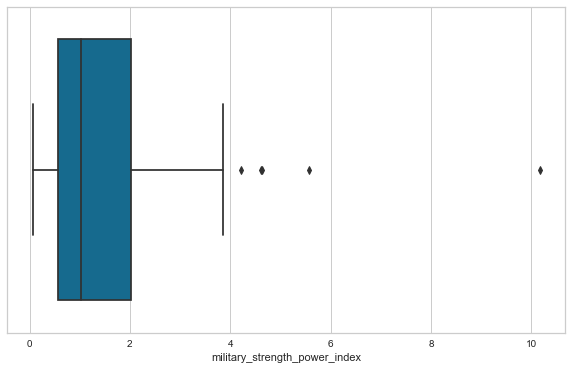

In [227]:
sns.boxplot(data=temp_power_index,x='military_strength_power_index')

The highest index value is just above 10 and belongs to Bhutan. This country has very little about military. It is very undeveloped country and it can be considered as outlier.

Another country that might negatively affect the clustering performance  is United States. The values in all features are quite higher than the rest. Indeed, United States contitutes a cluster itself alone. It is no need to include into K-Means model. Therefore, United States would be dropped from dataframe.

In [494]:
df=df.drop(['United States','Bhutan'],axis=0)

In [495]:
#two countries should be dropped from military power index
temp_power_index.drop(['United States','Bhutan'],axis=0)

,military_strength_power_index
country,
Afghanistan,1.344
Albania,2.314
Algeria,0.466
Angola,0.838
Argentina,0.652
Armenia,2.125
Australia,0.323
Austria,0.957
Azerbaijan,0.946


When a country has a lower military strength power index, this country has a strong military power. So, let us check the relationship of that index with other features by drawing scatter plots. The plots as below show that power index has negative correlation with other features as expected.

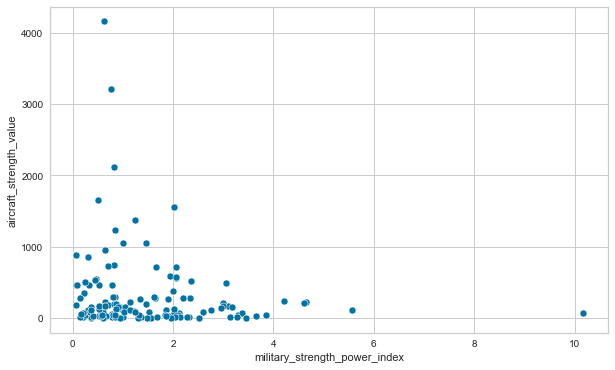

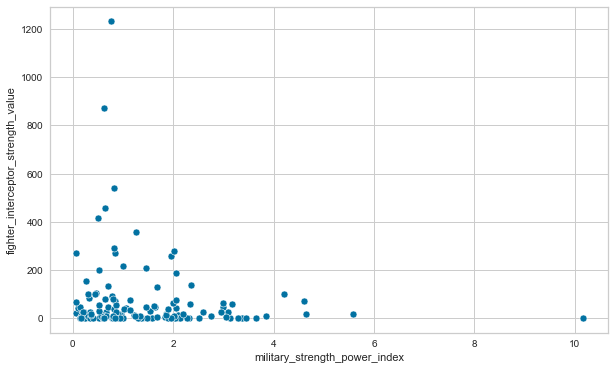

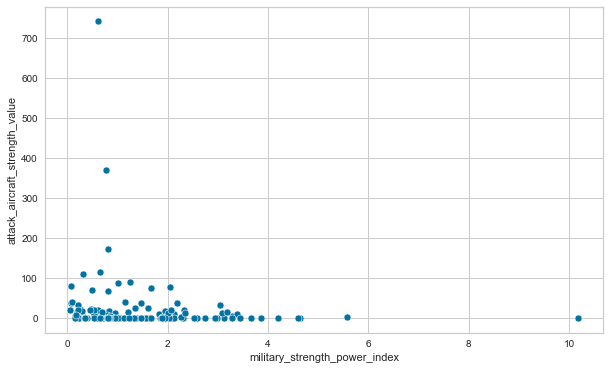

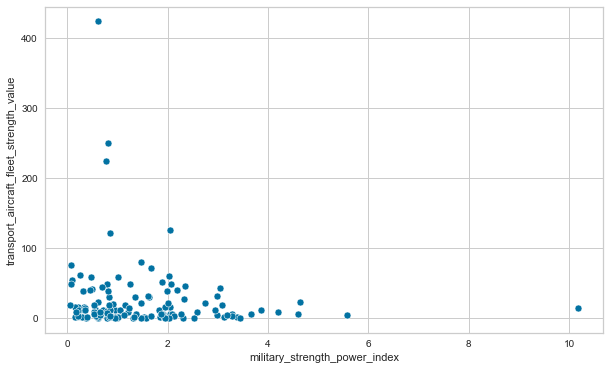

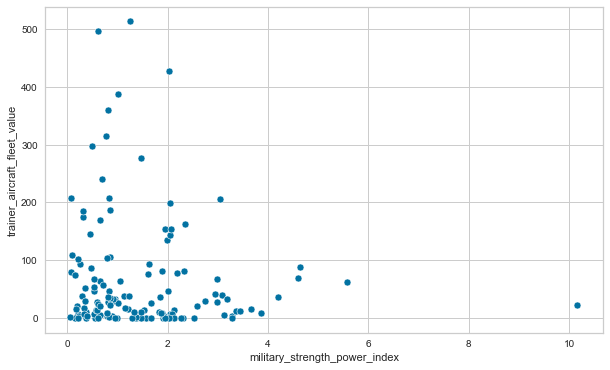

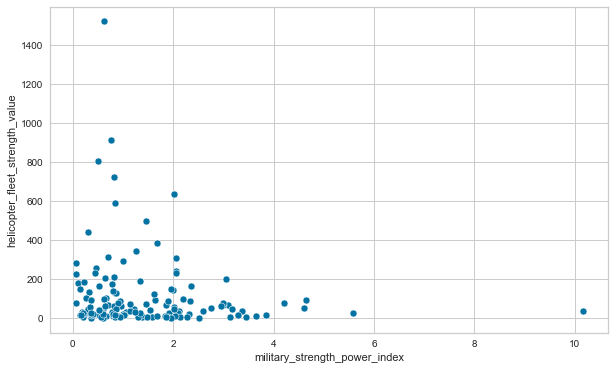

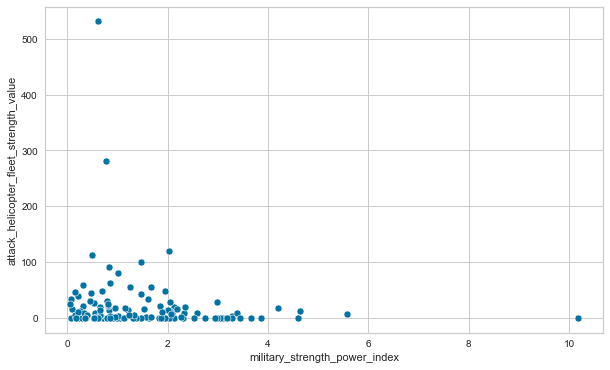

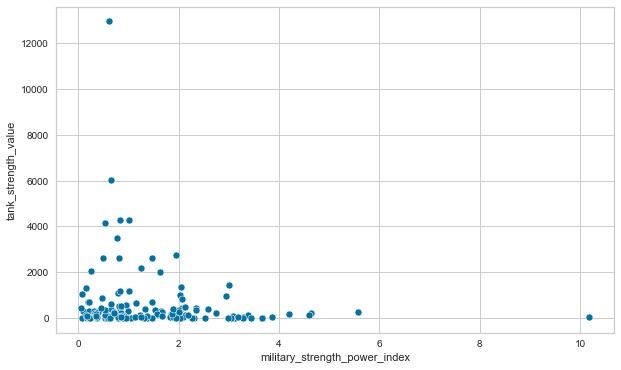

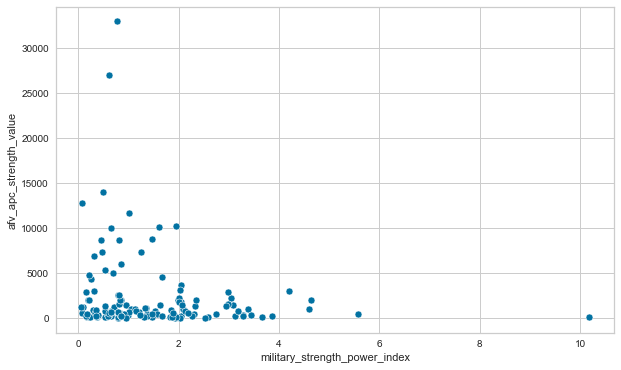

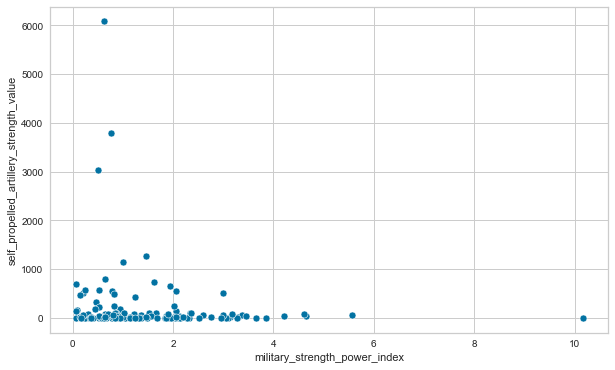

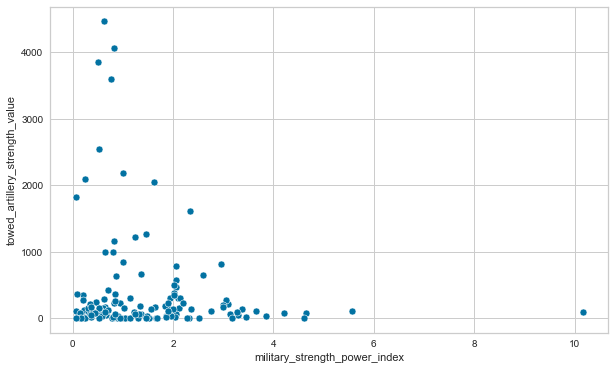

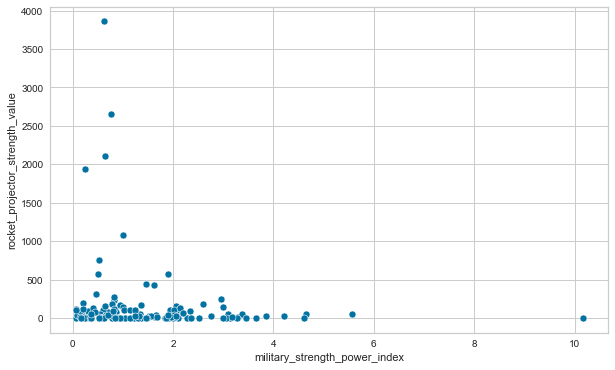

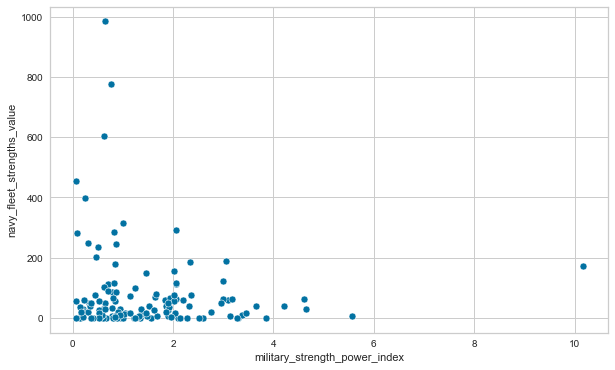

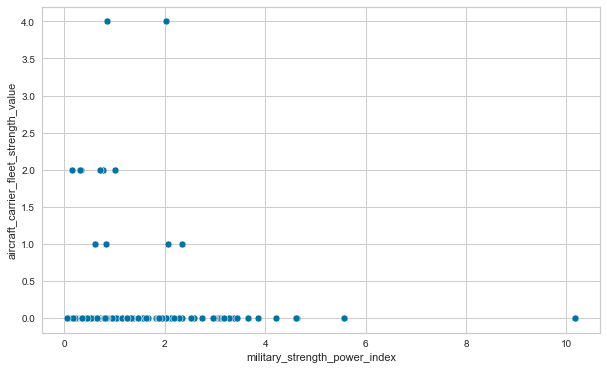

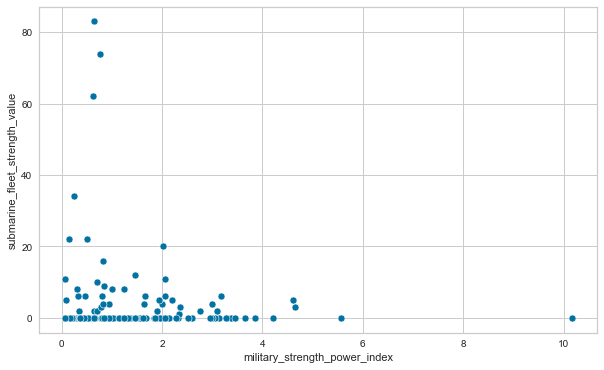

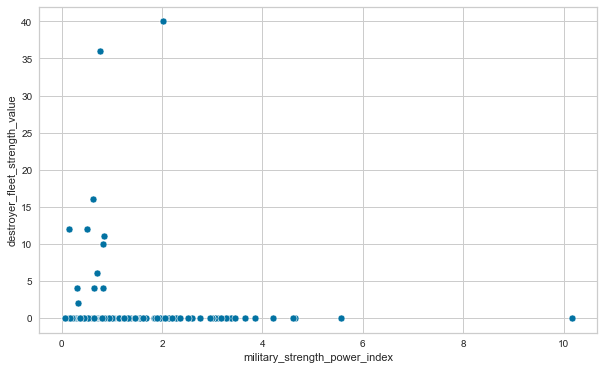

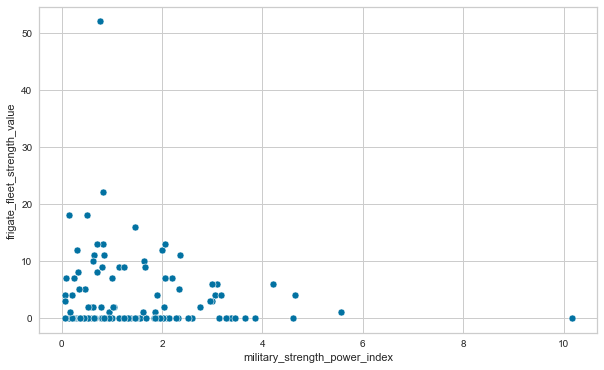

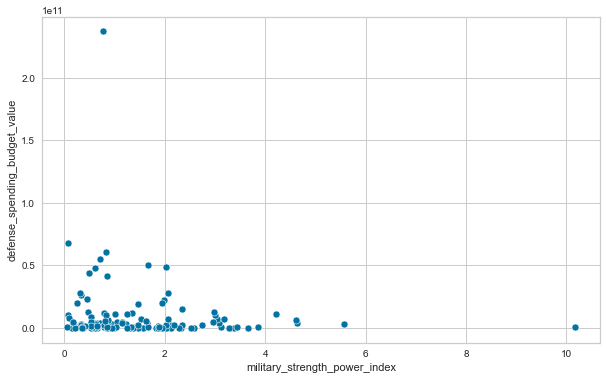

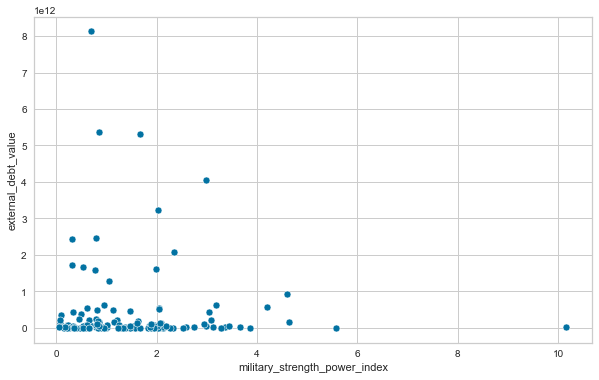

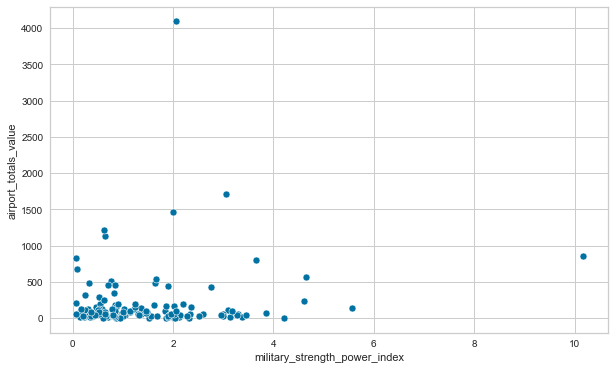

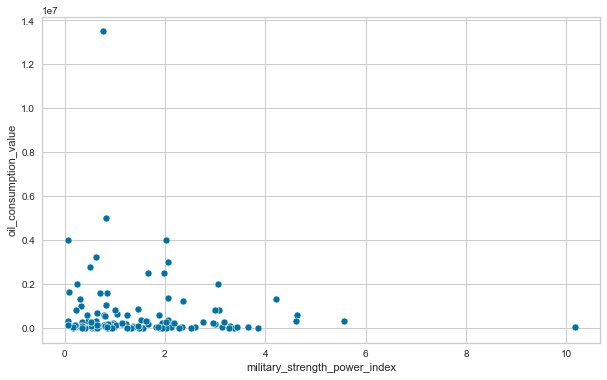

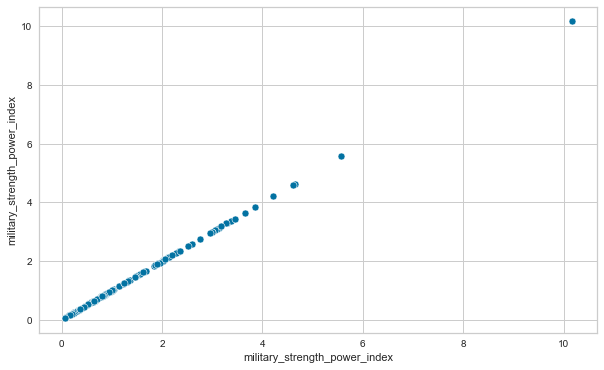

In [232]:
temp_df=df.copy()
temp_df.reset_index(drop=True, inplace=True)
temp_df['military_strength_power_index']=temp_power_index.military_strength_power_index
for col in temp_df.columns:
    sns.scatterplot(data=temp_df, x=temp_df.military_strength_power_index, y=temp_df[col]) 
    plt.show();

Let us focus on aircraft strength. This feature is strongly postitively related to air strike capacities. When a country has more air force instruments, then this indicates more aircraft strength as expected.

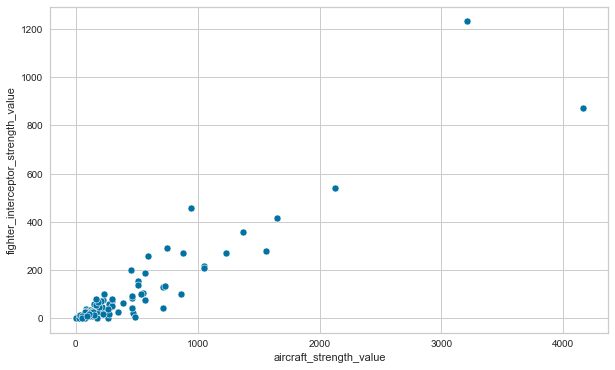

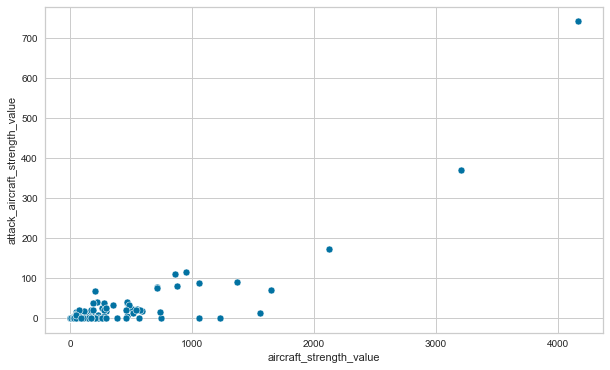

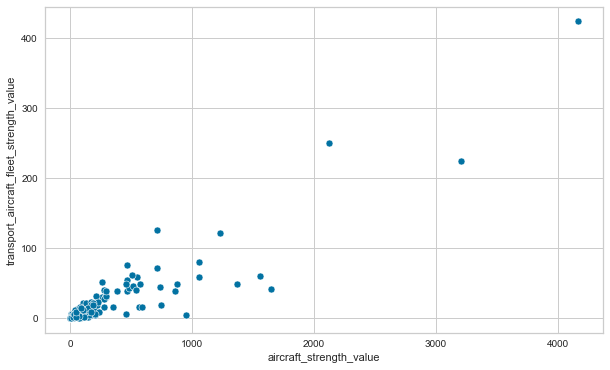

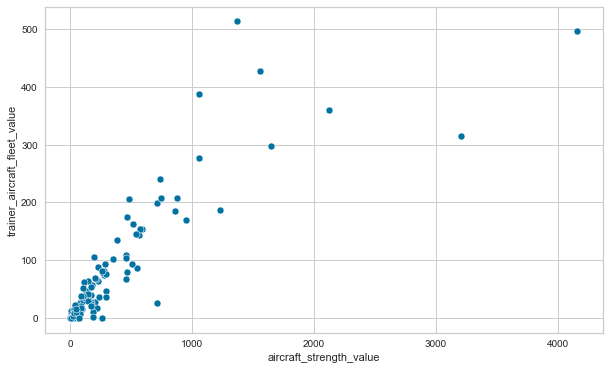

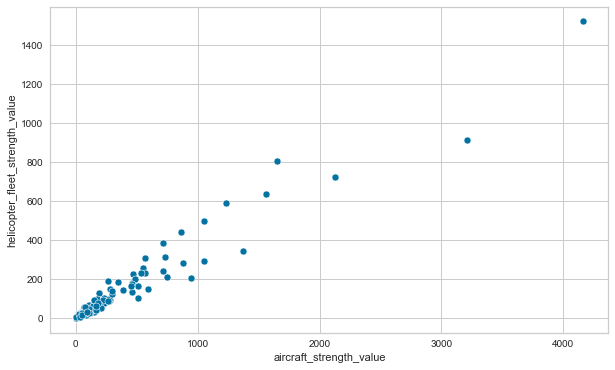

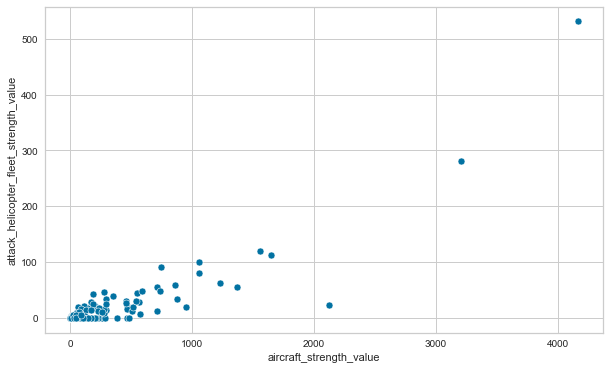

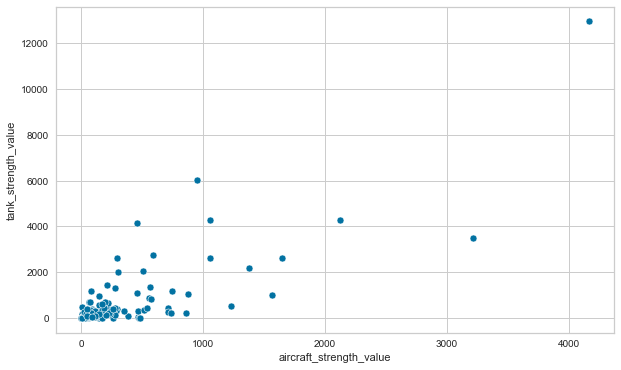

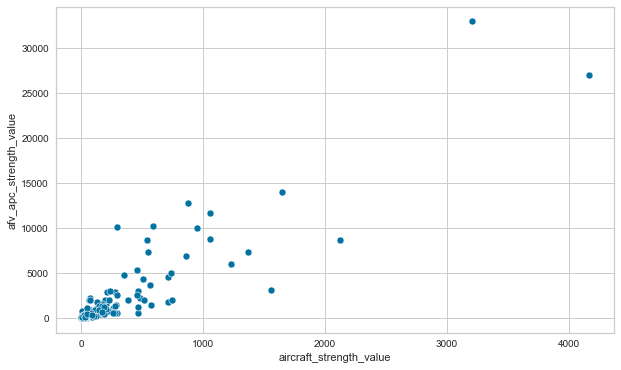

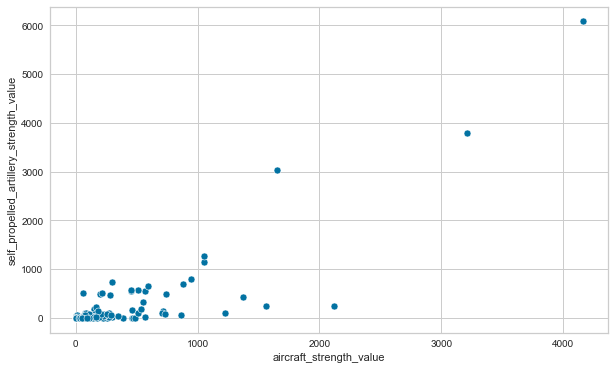

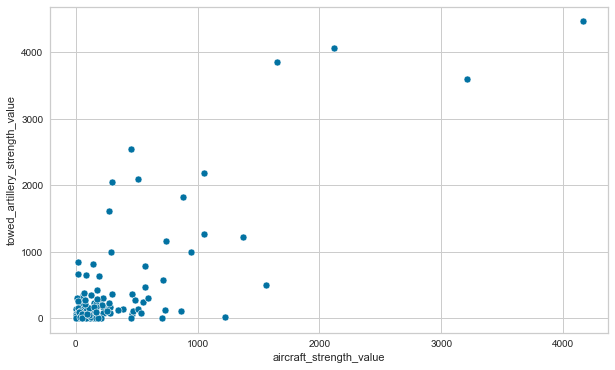

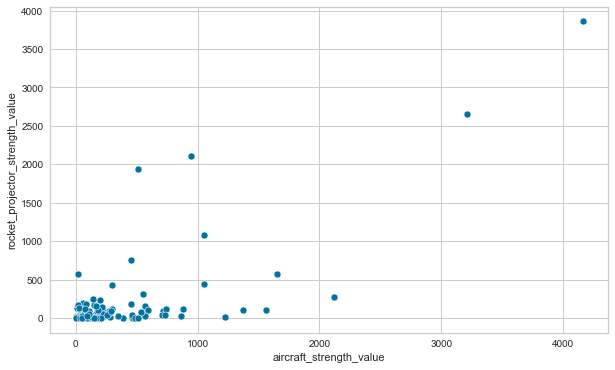

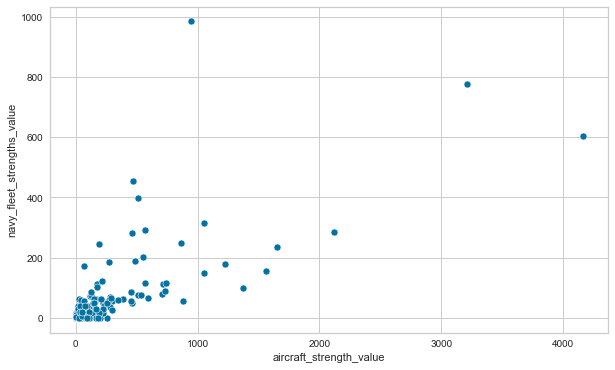

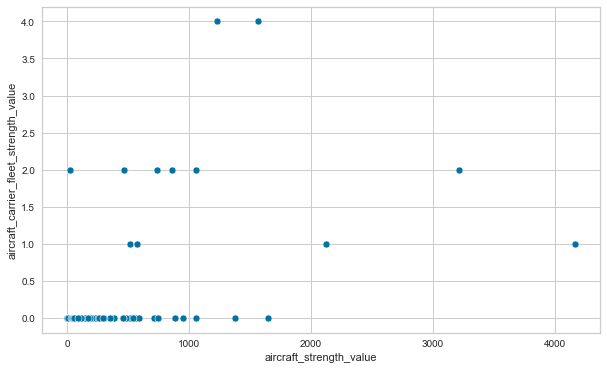

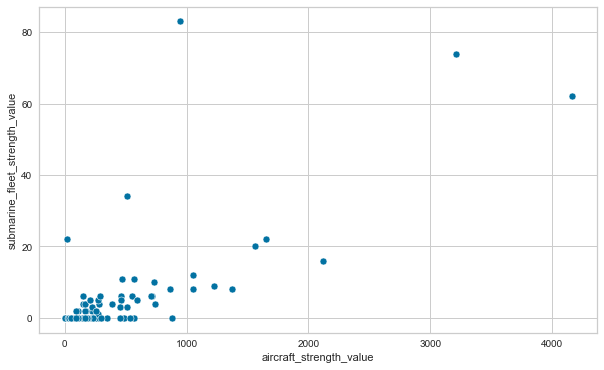

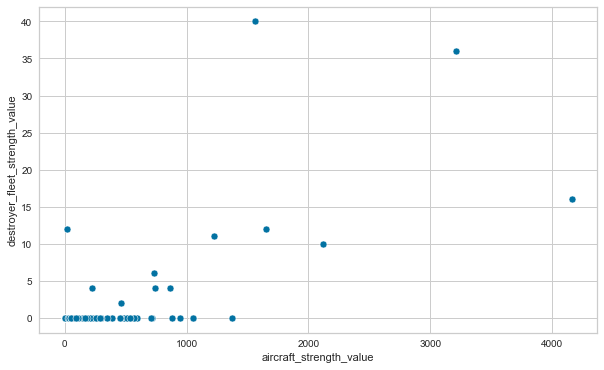

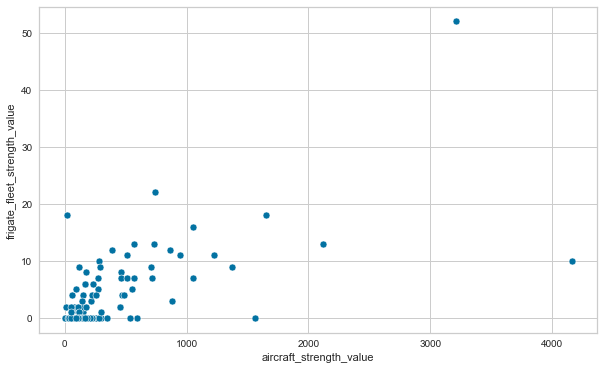

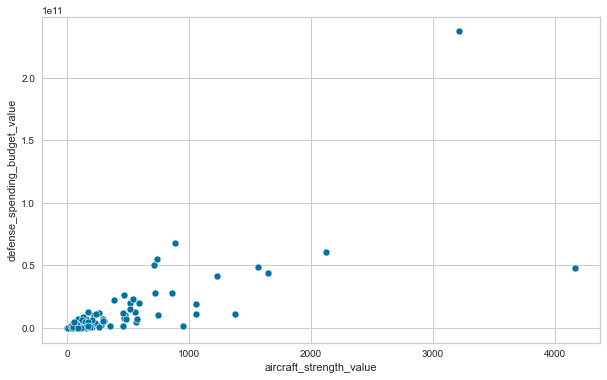

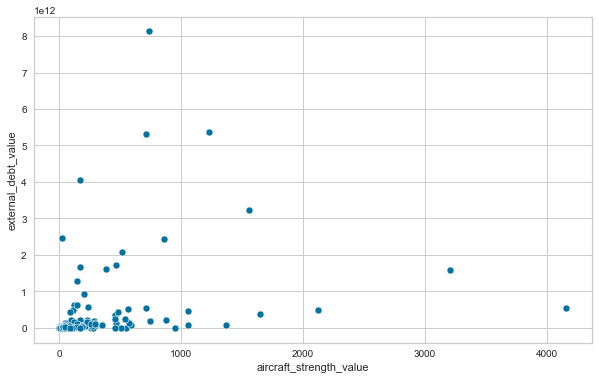

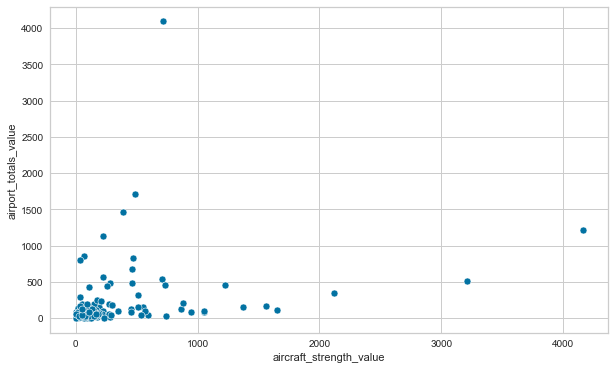

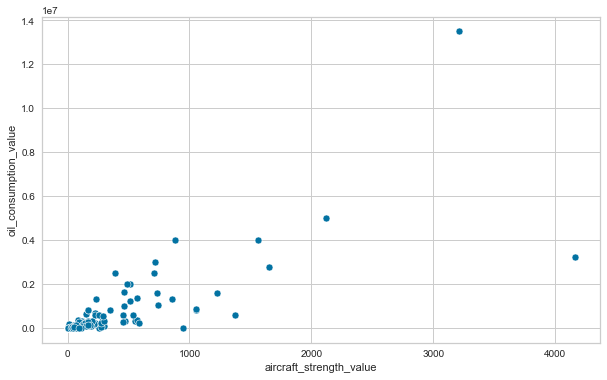

In [235]:
for col in temp_df.columns[1:21]:
    sns.scatterplot(data=temp_df, x=temp_df.aircraft_strength_value, y=temp_df[col])
    plt.show();

Similar let us focus on navy strength. This feature is also strongly postitively related to strike capacities in seas. When a country has more strikers, then this indicates more navy strength as expected. For example, submarines considerably contribute this measurement.

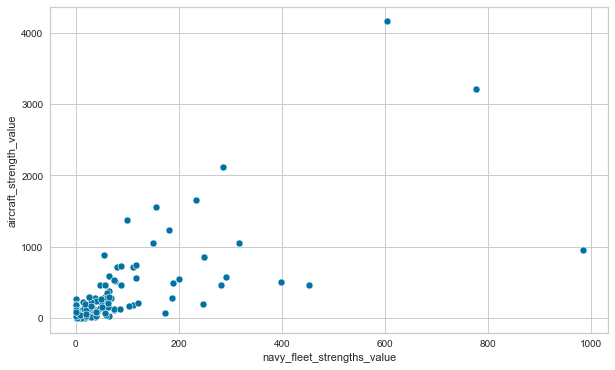

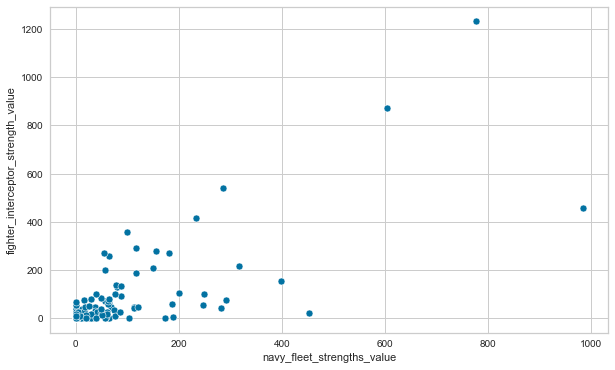

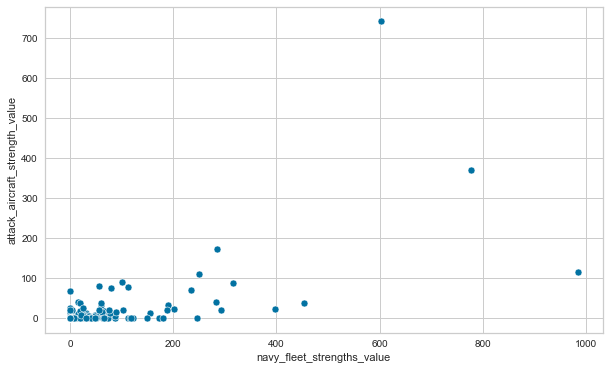

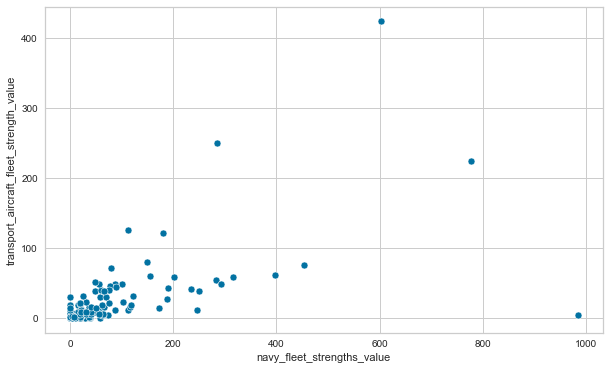

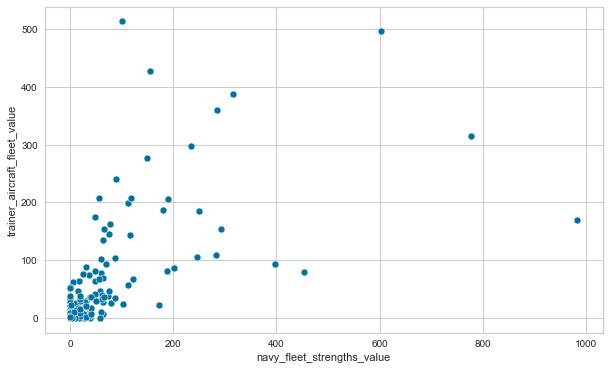

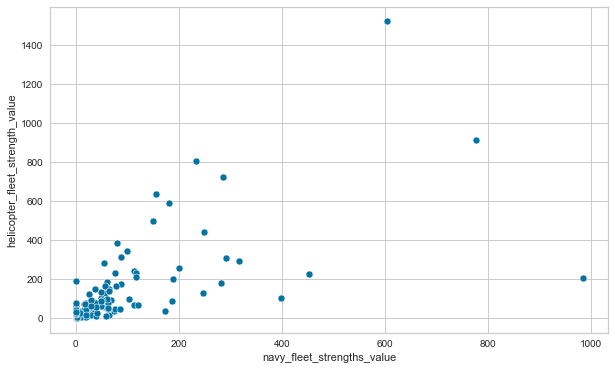

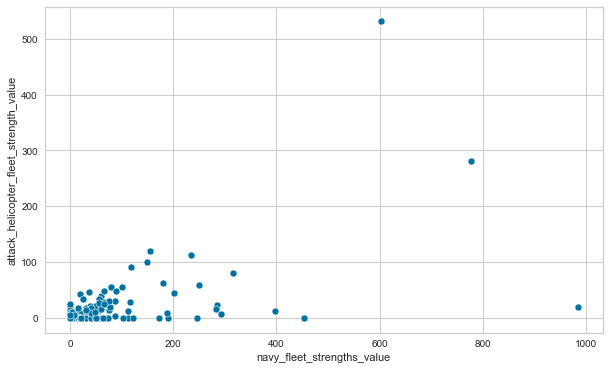

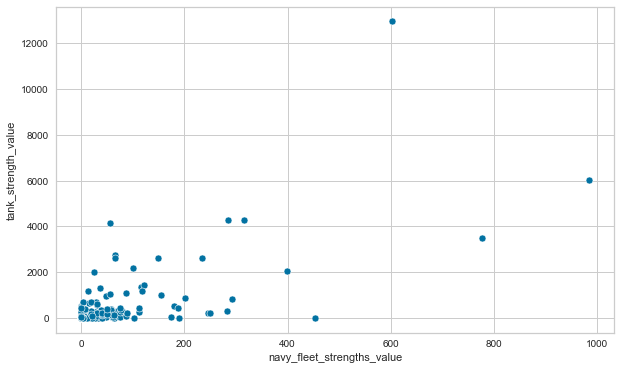

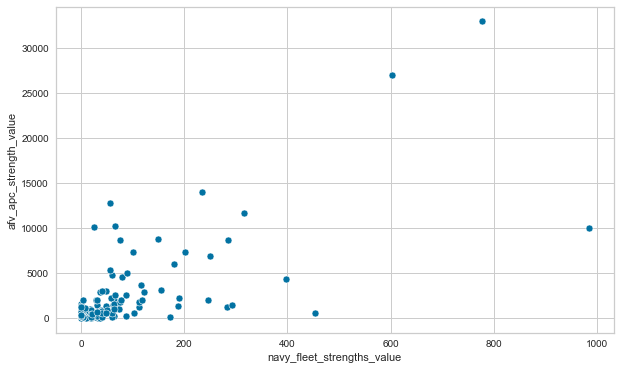

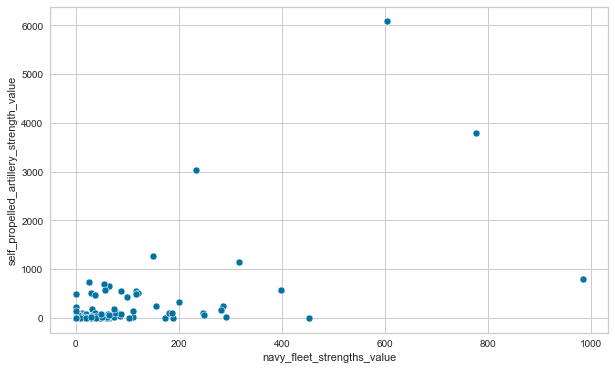

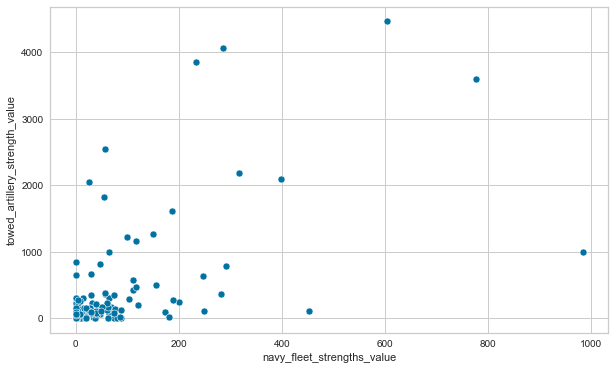

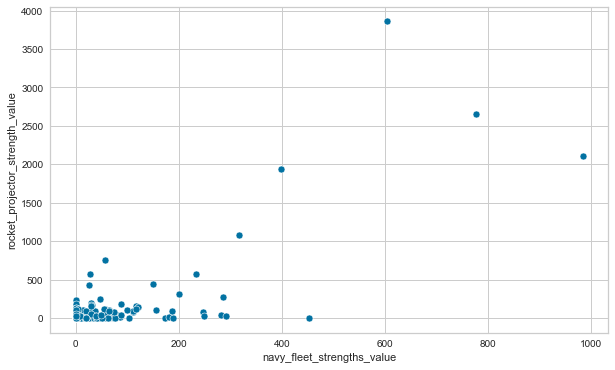

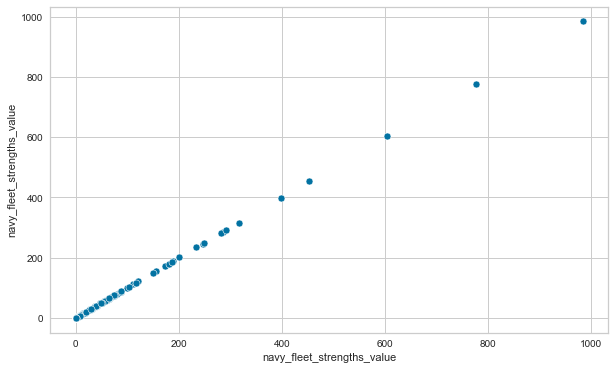

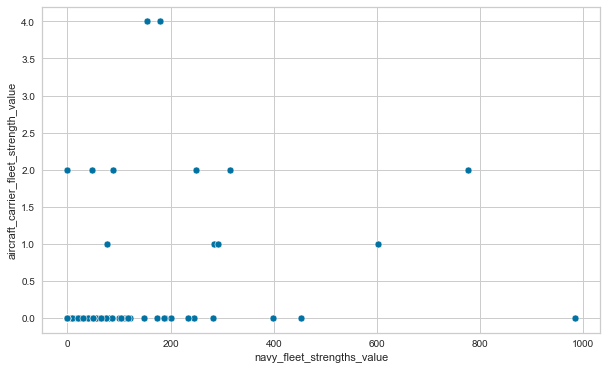

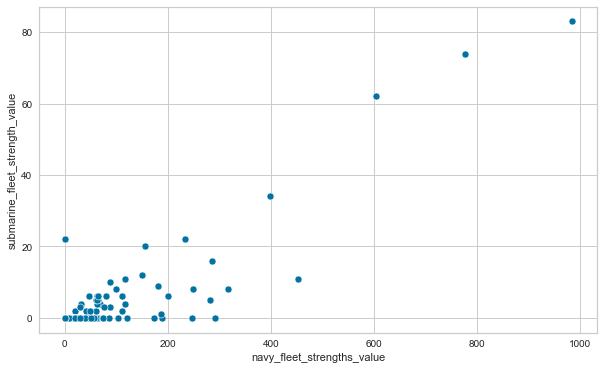

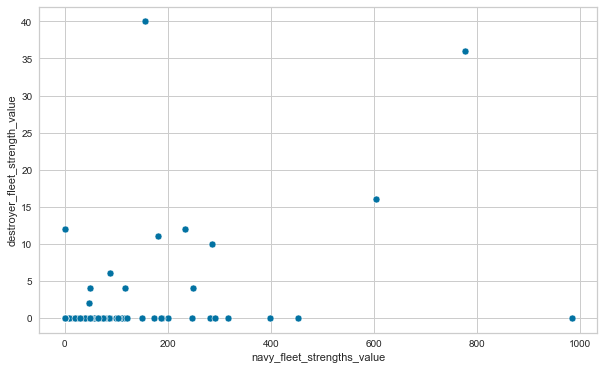

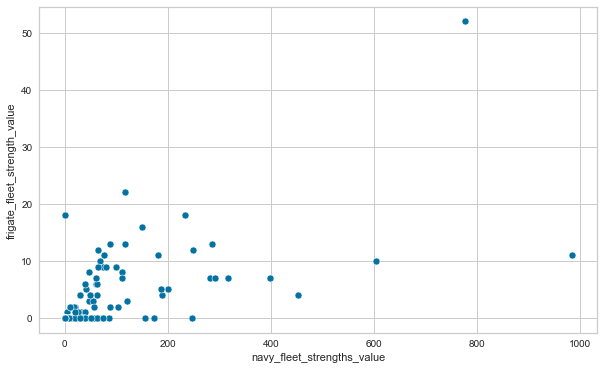

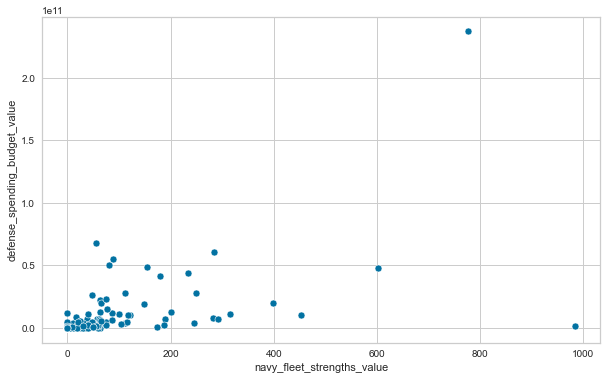

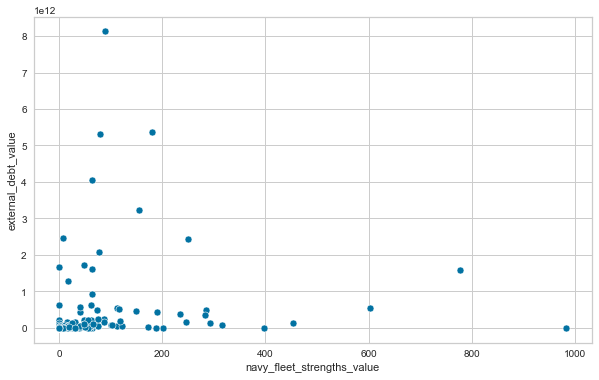

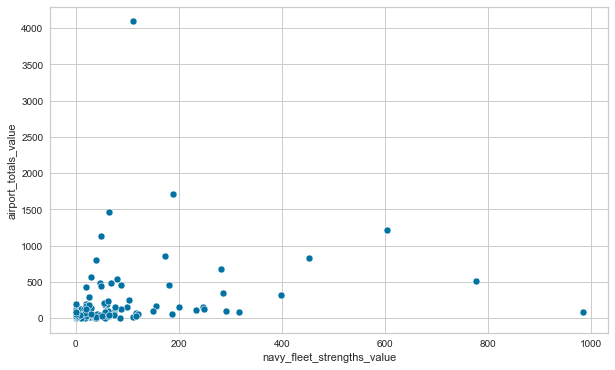

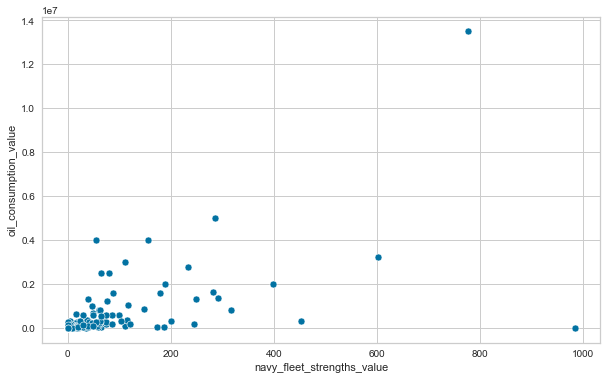

In [237]:
for col in temp_df.columns[:-1]:
    sns.scatterplot(data=temp_df, x=temp_df.navy_fleet_strengths_value, y=temp_df[col])
    plt.show();


Furthermore, let us observe the correlation matrices. 

<AxesSubplot:>

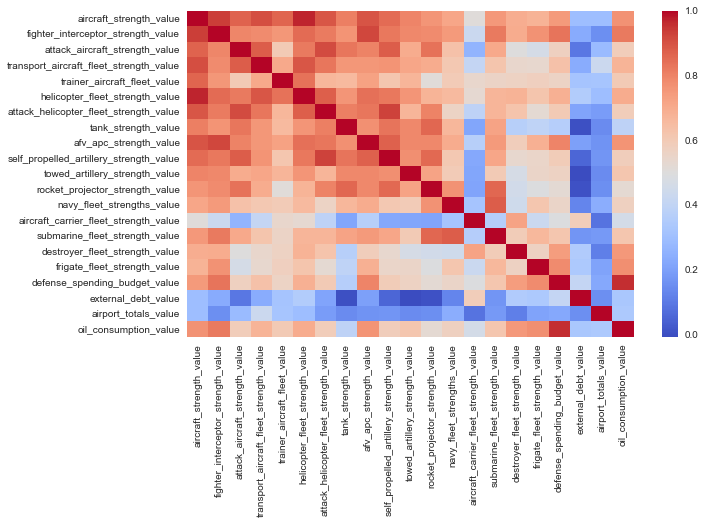

In [238]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

The correlation matrix above is so messy. Let us concentrate on higher correlations.

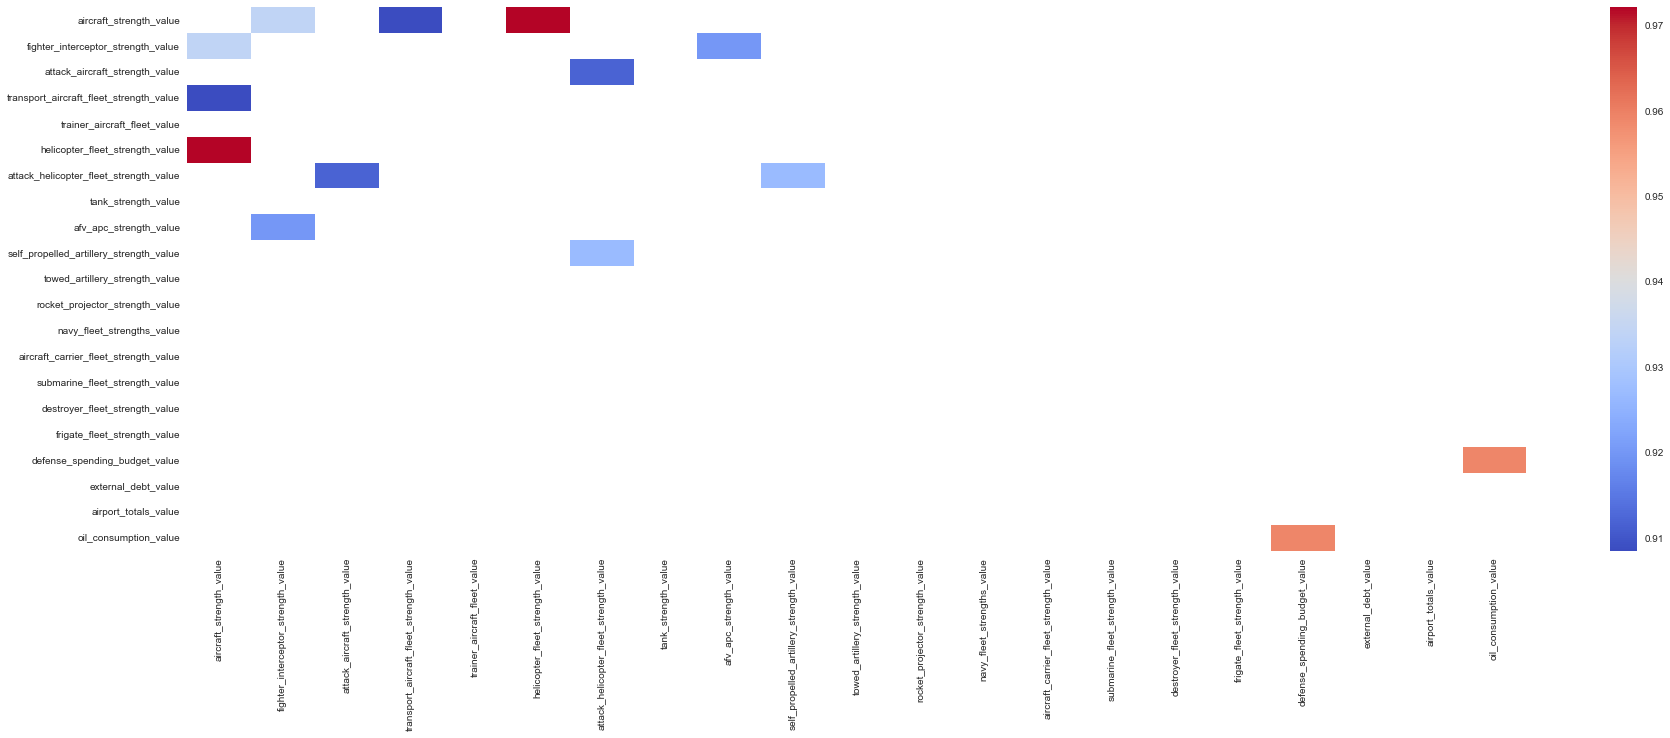

In [239]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .9) | (dfCorr <= -.9)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
plt.show()

__Summary:__ Aircraft strength feature has positive correlation with helicopter fleet, fighter, transport aircaraft. This means that countries invest more in them. There is another correlation between attack helicopter and fighter interceptor. Countries defense budget has a positive correlation with oil consumption, which is quite intitutive. 

## Decriptive statistics

In [240]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aircraft_strength_value,136.000,296.640,550.153,0.000,33.000,111.000,284.750,4163.000
fighter_interceptor_strength_value,136.000,67.434,154.446,0.000,0.000,17.000,59.500,1232.000
attack_aircraft_strength_value,136.000,20.882,74.298,0.000,0.000,0.000,15.250,742.000
transport_aircraft_fleet_strength_value,136.000,23.728,49.023,0.000,3.000,9.000,24.000,424.000
trainer_aircraft_fleet_value,136.000,64.618,99.543,0.000,4.750,26.000,77.750,513.000
helicopter_fleet_strength_value,136.000,113.904,198.368,0.000,15.750,44.000,126.250,1522.000
attack_helicopter_fleet_strength_value,136.000,18.890,54.752,0.000,0.000,2.000,17.250,531.000
tank_strength_value,136.000,609.831,1445.811,0.000,19.750,153.000,434.750,12950.000
afv_apc_strength_value,136.000,2233.426,4425.519,0.000,250.750,734.500,2000.000,33000.000
self_propelled_artillery_strength_value,136.000,204.507,684.381,0.000,0.000,23.000,95.750,6083.000


Notice that the range of features is very high. So, the scaling would be a better choice before modeling. Some features have bigger standard deviation. That might indicates some outliers.

# Data Preprocessing

In [58]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale

In [59]:
#let us keep original dataframe and create a copy
#sort by military power index and then reset index by dropping country name indices
df_new = df.copy()
#df_new.sort_values(by="military_strength_power_index", inplace=True)
#df_new.reset_index(drop=True, inplace=True)
df_new.head().T

country,Afghanistan,Albania,Algeria,Angola,Argentina
aircraft_strength_value,260.000,19.000,551.000,295.000,227.000
fighter_interceptor_strength_value,0.000,0.000,103.000,72.000,24.000
attack_aircraft_strength_value,25.000,0.000,22.000,18.000,7.000
transport_aircraft_fleet_strength_value,30.000,0.000,59.000,30.000,9.000
trainer_aircraft_fleet_value,0.000,0.000,87.000,47.000,64.000
helicopter_fleet_strength_value,187.000,19.000,257.000,126.000,100.000
attack_helicopter_fleet_strength_value,0.000,0.000,45.000,15.000,0.000
tank_strength_value,0.000,0.000,880.000,379.000,370.000
afv_apc_strength_value,1062.000,467.000,7361.000,595.000,739.000
self_propelled_artillery_strength_value,0.000,0.000,320.000,28.000,83.000


In [60]:
df_new.reset_index(drop=True, inplace=True)
df_new.head().T

,0,1,2,3,4
aircraft_strength_value,260.000,19.000,551.000,295.000,227.000
fighter_interceptor_strength_value,0.000,0.000,103.000,72.000,24.000
attack_aircraft_strength_value,25.000,0.000,22.000,18.000,7.000
transport_aircraft_fleet_strength_value,30.000,0.000,59.000,30.000,9.000
trainer_aircraft_fleet_value,0.000,0.000,87.000,47.000,64.000
helicopter_fleet_strength_value,187.000,19.000,257.000,126.000,100.000
attack_helicopter_fleet_strength_value,0.000,0.000,45.000,15.000,0.000
tank_strength_value,0.000,0.000,880.000,379.000,370.000
afv_apc_strength_value,1062.000,467.000,7361.000,595.000,739.000
self_propelled_artillery_strength_value,0.000,0.000,320.000,28.000,83.000


In [61]:
X = df_new

In [62]:
scaler = scale

In [63]:
X_scaled = pd.DataFrame(scaler(X))

In [64]:
X_scaled.head().T

,0,1,2,3,4
0,-0.067,-0.507,0.464,-0.003,-0.127
1,-0.438,-0.438,0.231,0.030,-0.282
2,0.056,-0.282,0.015,-0.039,-0.188
3,0.128,-0.486,0.722,0.128,-0.302
4,-0.652,-0.652,0.226,-0.178,-0.006
5,0.370,-0.480,0.724,0.061,-0.070
6,-0.346,-0.346,0.479,-0.071,-0.346
7,-0.423,-0.423,0.188,-0.160,-0.166
8,-0.266,-0.401,1.163,-0.372,-0.339
9,-0.300,-0.300,0.169,-0.259,-0.178


In [65]:
X_scaled.shape

(136, 21)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [66]:
from pyclustertend import hopkins

The dataframe has to be scaled since the ranges are quite different for all features. Let us calculate hopkins test values with and without scaling.

In [67]:
#without scaling
hopkins(df, df.shape[0])

0.1143503096519147

In [68]:
#make copy of dataframe for three different scaling approach
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [69]:
hopkins(scale(df), df.shape[0])

0.09303956400994152

In [74]:
hopkins(scale(df1), df1.shape[0])

0.0943163132441215

In [71]:
hopkins(MinMaxScaler().fit_transform(df2), df2.shape[0])

0.09706161805598888

In [75]:
hopkins(StandardScaler().fit_transform(df3), df3.shape[0])

0.09553417764172714

__Summary:__ For all scalers as well as without scaling, hopkins tests indicate that dataframe is suitable to create clusters. But, the lowest score is obtained for ___'scale'___ method. Let us use ___'scale'___ in order to scale the dataset.

## Clustering with K-means

In [76]:
from sklearn.cluster import KMeans
K_means_model = KMeans(n_clusters=8,random_state = 101)

In [77]:
K_means_model.fit_predict(X_scaled)

array([5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 0,
       5, 5, 0, 1, 0, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 0, 3, 5, 5, 3, 5,
       0, 5, 5, 5, 4, 0, 0, 5, 5, 0, 3, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 7, 5,
       5, 5, 4, 5, 5, 5, 5, 0, 5, 5, 5, 5, 2, 4, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 0, 5, 5, 5, 5, 5, 0, 0, 5, 5, 0, 5, 4, 5, 5, 0, 0, 3, 5, 5, 5,
       0, 5, 5, 5])

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [78]:
#search over k values from 2 to 12
ssd = []

K = range(2,12)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

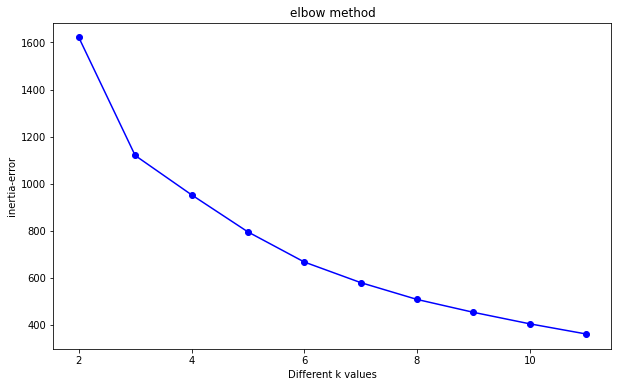

In [79]:
#visualize the errors with respect to k values
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [80]:
ssd # sum of squared distance

[1621.3348787882428,
 1119.8263257288936,
 952.8225809352114,
 795.224881287894,
 667.2543060108258,
 579.8356844720886,
 508.2620183062144,
 453.54040723926374,
 404.65366800989466,
 361.47670096534904]

In [81]:
df1_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df1_diff

,0
1,NaN
2,501.509
3,167.004
4,157.598
5,127.971
6,87.419
7,71.574
8,54.722
9,48.887
10,43.177


<AxesSubplot:>

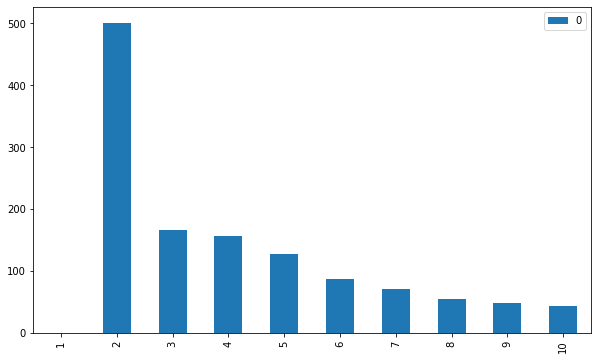

In [82]:
df1_diff.plot(kind='bar')

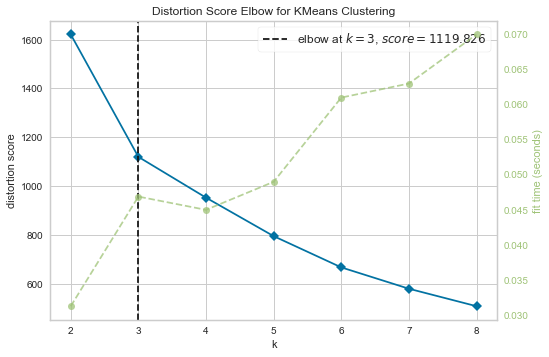

In [83]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

#### Silhoutte Analysis

In [84]:
from sklearn.metrics import silhouette_score

In [241]:
# silhouette score for k=8 which is default value of n_clusters
silhouette_score(X_scaled, K_means_model.labels_)  

0.49921308843373197

In [242]:
range_n_clusters = range(2, 10)

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8609878837918018
For n_clusters=3, the silhouette score is 0.6722084361208152
For n_clusters=4, the silhouette score is 0.6610960334021277
For n_clusters=5, the silhouette score is 0.6378404943183618
For n_clusters=6, the silhouette score is 0.5180756627928427
For n_clusters=7, the silhouette score is 0.539642426257314
For n_clusters=8, the silhouette score is 0.49921308843373197
For n_clusters=9, the silhouette score is 0.459561597357193


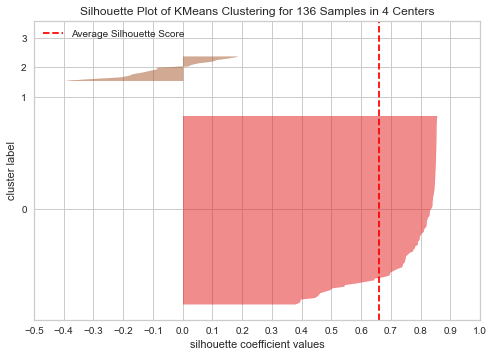

In [85]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

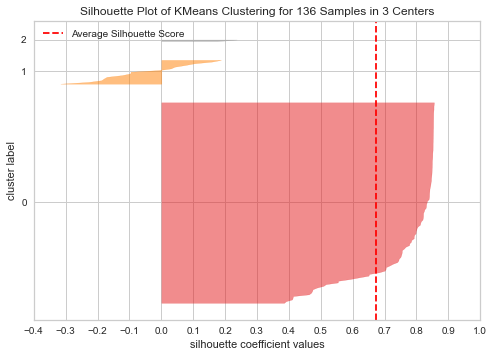

In [86]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=101)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

### Model Building and label visualisation

In [87]:
# n_clusters=3 is chosen as optimal k value

model = KMeans(n_clusters=3, random_state=101)

model.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0])

In [88]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0])

In [89]:
X["clusters"] = model.fit_predict(X_scaled)

In [355]:
X.head().T

,0,1,2,3,4
aircraft_strength_value,260.000,19.000,551.000,295.000,227.000
fighter_interceptor_strength_value,0.000,0.000,103.000,72.000,24.000
attack_aircraft_strength_value,25.000,0.000,22.000,18.000,7.000
transport_aircraft_fleet_strength_value,30.000,0.000,59.000,30.000,9.000
trainer_aircraft_fleet_value,0.000,0.000,87.000,47.000,64.000
helicopter_fleet_strength_value,187.000,19.000,257.000,126.000,100.000
attack_helicopter_fleet_strength_value,0.000,0.000,45.000,15.000,0.000
tank_strength_value,0.000,0.000,880.000,379.000,370.000
afv_apc_strength_value,1062.000,467.000,7361.000,595.000,739.000
self_propelled_artillery_strength_value,0.000,0.000,320.000,28.000,83.000


__Clustering:__ Remember United States is one cluster. Now, K_Means model has found 3 clusters. Cluster 0 has 119 countries, cluster 1 has 15 and cluster 2 has only two countries.

In [90]:
X.clusters.value_counts()

0    119
1     15
2      2
Name: clusters, dtype: int64

Now, for model performace let us reassign military power index in dataframe

In [251]:
df1.reset_index(inplace=True)
df1["military_strength_power_index"] = temp_index["military_strength_power_index"]

In [252]:
#make the prediction in dataframe
df1["predicted_clusters"] = model.fit_predict(X_scaled)

In [253]:
#sort dataframe with ascending order of military power index
df1.sort_values(by="military_strength_power_index",inplace=True)
df1.reset_index(drop=True,inplace=True)
df1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
country,Russia,China,India,Japan,South Korea,France,United Kingdom,Egypt,Brazil,Turkey,Italy,Germany,Iran,Pakistan,Indonesia,Saudi Arabia,Israel,Australia,Spain,Poland,Vietnam,Thailand,Canada,North Korea,Taiwan,Ukraine,Algeria,South Africa,Switzerland,Norway,Sweden,Greece,Czechia,Myanmar,Netherlands,Colombia,Mexico,Romania,Peru,Venezuela,Nigeria,Argentina,Malaysia,United Arab Emirates,Bangladesh,Chile,Philippines,Denmark,Iraq,Singapore,Uzbekistan,Belarus,Hungary,Syria,Angola,Morocco,Slovakia,Finland,Ethiopia,Portugal,Bulgaria,Kazakhstan,Azerbaijan,Serbia,Austria,Bolivia,Ecuador,Croatia,Belgium,Democratic Republic of the Congo,Jordan,Cuba,Yemen,Oman,Sudan,Turkmenistan,Afghanistan,New Zealand,Libya,Tunisia,Sri Lanka,Lithuania,Kenya,Kuwait,Uganda,Chad,Zambia,Georgia,Qatar,Zimbabwe,Guatemala,Bahrain,Tajikistan,Uruguay,Mali,Burkina Faso,Kyrgyzstan,Ireland,Slovenia,Cameroon,Latvia,Niger,Ivory Coast,Mongolia,Ghana,Cambodia,Botswana,Tanzania,Honduras,Armenia,Moldova,Paraguay,Nicaragua,Albania,Mozambique,South Sudan,Lebanon,Estonia,Dominican Republic,Republic of the Congo,Nepal,Montenegro,Mauritania,Madagascar,El Salvador,North Macedonia,Namibia,Central African Republic,Gabon,Laos,Panama,Bosnia and Herzegovina,Sierra Leone,Suriname,Somalia,Liberia
aircraft_strength_value,4163.000,3210.000,2123.000,1561.000,1649.000,1229.000,733.000,1054.000,715.000,1055.000,860.000,712.000,509.000,1372.000,462.000,879.000,589.000,464.000,512.000,457.000,293.000,570.000,385.000,949.000,744.000,297.000,551.000,226.000,169.000,150.000,204.000,566.000,95.000,276.000,168.000,469.000,484.000,143.000,273.000,260.000,129.000,227.000,170.000,538.000,177.000,282.000,171.000,113.000,348.000,235.000,185.000,202.000,47.000,456.000,295.000,214.000,47.000,194.000,86.000,90.000,63.000,222.000,147.000,109.000,120.000,69.000,108.000,78.000,148.000,53.000,278.000,80.000,169.000,131.000,190.000,72.000,260.000,48.000,114.000,147.000,77.000,10.000,150.000,85.000,48.000,35.000,108.000,66.000,123.000,90.000,33.000,109.000,25.000,50.000,29.000,16.000,5.000,19.000,38.000,29.000,5.000,16.000,8.000,9.000,24.000,22.000,45.000,34.000,46.000,64.000,3.000,33.000,19.000,19.000,16.000,19.000,70.000,7.000,49.000,13.000,16.000,9.000,28.000,6.000,51.000,20.000,30.000,3.000,23.000,33.000,39.000,19.000,5.000,3.000,0.000,0.000
fighter_interceptor_strength_value,873.000,1232.000,538.000,279.000,414.000,269.000,133.000,215.000,43.000,206.000,99.000,128.000,155.000,356.000,41.000,270.000,259.000,82.000,137.000,91.000,77.000,75.000,62.000,458.000,289.000,48.000,103.000,17.000,54.000,59.000,71.000,187.000,12.000,59.000,61.000,21.000,3.000,26.000,17.000,38.000,8.000,24.000,26.000,98.000,44.000,44.000,0.000,33.000,26.000,100.000,66.000,39.000,12.000,199.000,72.000,46.000,10.000,55.000,24.000,24.000,13.000,76.000,17.000,9.000,15.000,0.000,9.000,12.000,43.000,2.000,44.000,38.000,77.000,29.000,46.000,24.000,0.000,0.000,17.000,12.000,0.000,0.000,17.000,27.000,10.000,0.000,18.000,0.000,24.000,10.000,0.000,17.000,0.000,0.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,14.000,3.000,0.000,0.000,0.000,0.000,0.000,8.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,0.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
attack_aircraft_strength_value,742.000,371.000,172.000,12.000,71.000,0.000,15.000,88.000,78.000,0.000,110.000,74.000,23.000,90.000,39.000,81.000,18.000,6.000,12.000,0.000,0.000,19.000,0.000,114.000,0.000,25.000,22.000,0.000,0.000,15.000,0.000,0.000,16.000,21.000,1.000,38.000,33.000,0.000,38.000,0.000,13.000,

In [254]:
X.clusters.value_counts()

0    119
1     15
2      2
Name: clusters, dtype: int64

In the sorted dataframe, let us assign first two rows to second class, the following 15 rows to one class and the rest to zero class.

In [255]:
df1.loc[17:135, "actual_clusters"] = 0
df1.loc[2:16, "actual_clusters"] = 1
df1.loc[0:1, "actual_clusters"] = 2
df1[['country','actual_clusters','predicted_clusters']]

,country,actual_clusters,predicted_clusters
0,Russia,2.000,2
1,China,2.000,2
2,India,1.000,1
3,Japan,1.000,1
4,South Korea,1.000,1
5,France,1.000,1
6,United Kingdom,1.000,1
7,Egypt,1.000,1
8,Brazil,1.000,1
9,Turkey,1.000,1


In [256]:
#let us assign the cluster names
df1["predicted_military_power"] = df1["predicted_clusters"].map({0 : "low",
                                                                 1 : "medium",
                                                                 2 : "high"})

__Performance:__ Now, let us compare actual and predicted values.

In [257]:
(df1["actual_clusters"]==df1["predicted_clusters"]).value_counts()

True     132
False      4
dtype: int64

KMeasn algorithm has made 4 wrong assignments of countries into clusters.

In [258]:
pd.crosstab(index=df1["actual_clusters"], columns=df1["predicted_clusters"])

predicted_clusters,0,1,2
actual_clusters,,,
0.000,117,2,0
1.000,2,13,0
2.000,0,0,2


Indonesia and Israel should indeed be in medium cluster but they are assigned to low cluster. Similarly, North Korea and Taiwan should be in low cluster. But they are assigned to medium cluster.

In [259]:
df1[df1['actual_clusters']!=df1['predicted_clusters']].T

,14,16,23,24
country,Indonesia,Israel,North Korea,Taiwan
aircraft_strength_value,462.000,589.000,949.000,744.000
fighter_interceptor_strength_value,41.000,259.000,458.000,289.000
attack_aircraft_strength_value,39.000,18.000,114.000,0.000
transport_aircraft_fleet_strength_value,54.000,15.000,4.000,19.000
trainer_aircraft_fleet_value,109.000,154.000,169.000,207.000
helicopter_fleet_strength_value,177.000,146.000,204.000,210.000
attack_helicopter_fleet_strength_value,16.000,48.000,20.000,91.000
tank_strength_value,313.000,2760.000,6045.000,1180.000
afv_apc_strength_value,1178.000,10275.000,10000.000,2000.000


### Evaluate 

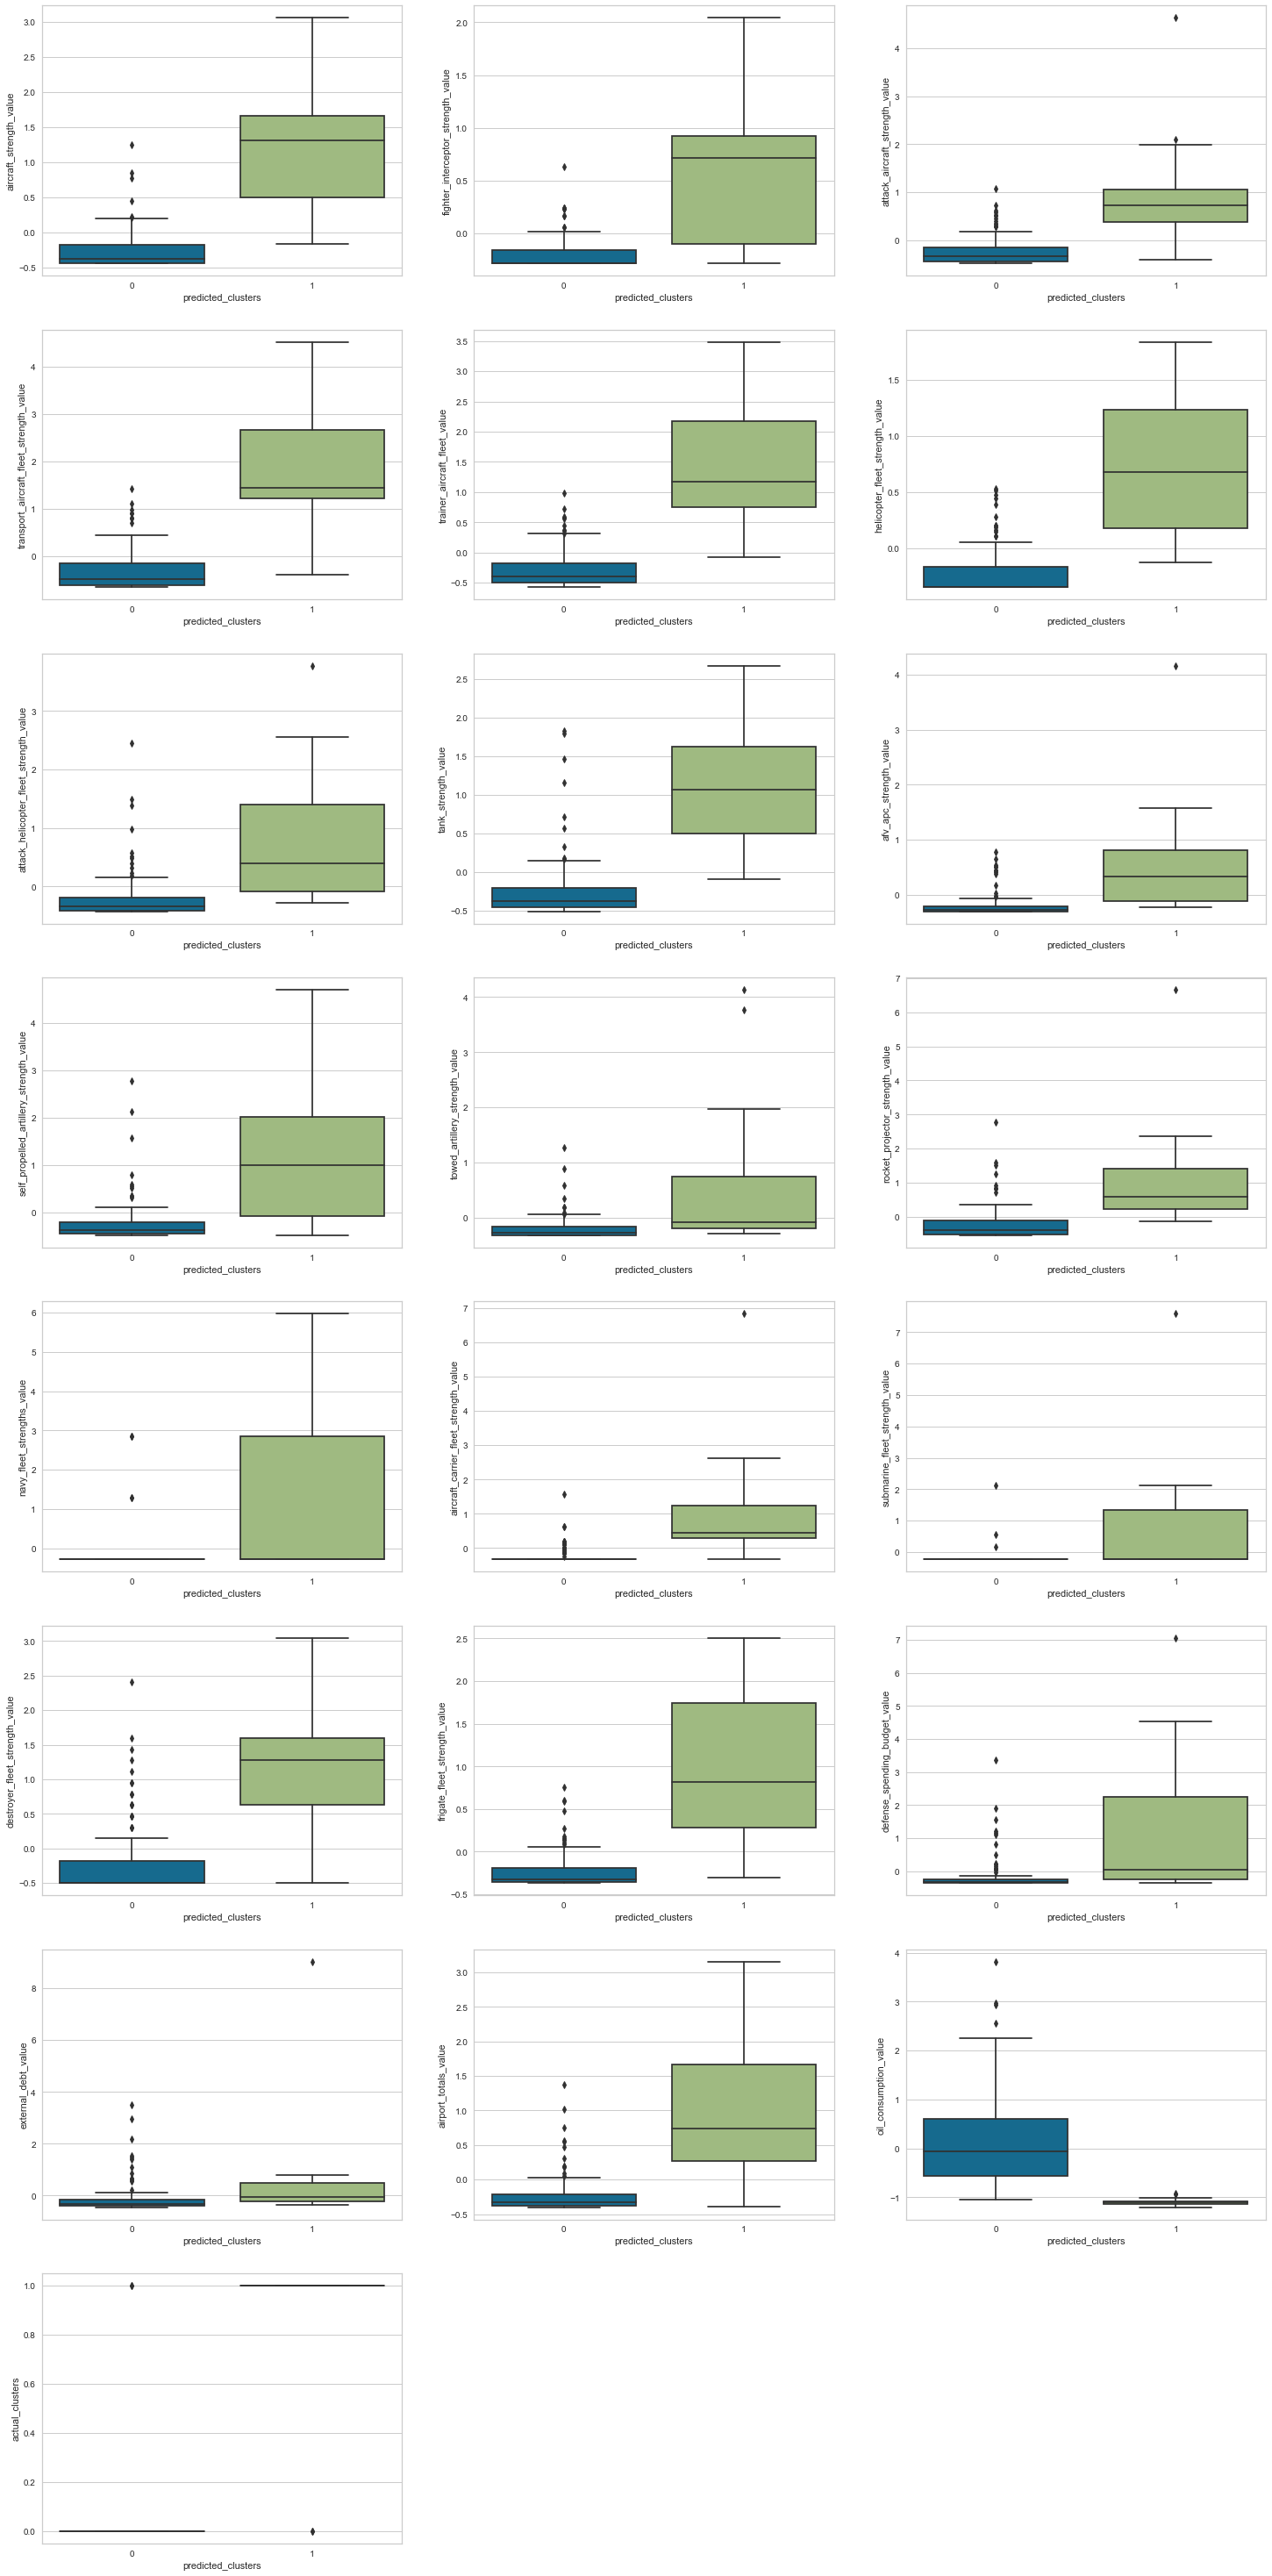

In [106]:
index = 0
plt.figure(figsize=(25, 60))
temp_df=df1.copy()
temp_df=temp_df.drop(["country",'predicted_clusters','actual_clusters','predicted_military_power'], axis=1)
scaler=scale
temp_df=pd.DataFrame(scaler(temp_df), columns=df1.columns[0:22])
temp_df['country']=df1['country']
temp_df["predicted_clusters"]=df1["predicted_clusters"]
temp_df["actual_clusters"]=df1["actual_clusters"]
temp_df=temp_df[(temp_df['predicted_clusters']==0 )| (temp_df['predicted_clusters']==1)]
for feature in temp_df.drop(["country"], axis=1):
    if feature != "predicted_clusters":
        index += 1
        plt.subplot(9, 3, index)
        sns.boxplot(x='predicted_clusters', y=feature, data=temp_df)

__Summary:__ The box plots are drawn for class label 0 and 1, which include errors in prediction. Class 0 has outliers and these values intercept with values in class 1. Moreover, in some cases, the box plot of two classes coincides. In order to eliminate 4 false prediction, the outliers should be revisited and some features could be dropped. But, this is costly and 4 failed prediction is acceptable in this clustering model.

In [260]:
#cluster high
df1[df1['predicted_military_power']=='high'].country

0    Russia
1     China
Name: country, dtype: object

In [261]:
#cluster medium
df1[df1['predicted_military_power']=='medium'].country

2              India
3              Japan
4        South Korea
5             France
6     United Kingdom
7              Egypt
8             Brazil
9             Turkey
10             Italy
11           Germany
12              Iran
13          Pakistan
15      Saudi Arabia
23       North Korea
24            Taiwan
Name: country, dtype: object

In [262]:
#cluster low
df1[df1['predicted_military_power']=='low'].country

14                            Indonesia
16                               Israel
17                            Australia
18                                Spain
19                               Poland
20                              Vietnam
21                             Thailand
22                               Canada
25                              Ukraine
26                              Algeria
27                         South Africa
28                          Switzerland
29                               Norway
30                               Sweden
31                               Greece
32                              Czechia
33                              Myanmar
34                          Netherlands
35                             Colombia
36                               Mexico
37                              Romania
38                                 Peru
39                            Venezuela
40                              Nigeria
41                            Argentina


## Hierarchical Clustering

In [496]:
df2 = df.copy()

In [497]:
df2.head().T

country,Afghanistan,Albania,Algeria,Angola,Argentina
aircraft_strength_value,260.000,19.000,551.000,295.000,227.000
fighter_interceptor_strength_value,0.000,0.000,103.000,72.000,24.000
attack_aircraft_strength_value,25.000,0.000,22.000,18.000,7.000
transport_aircraft_fleet_strength_value,30.000,0.000,59.000,30.000,9.000
trainer_aircraft_fleet_value,0.000,0.000,87.000,47.000,64.000
helicopter_fleet_strength_value,187.000,19.000,257.000,126.000,100.000
attack_helicopter_fleet_strength_value,0.000,0.000,45.000,15.000,0.000
tank_strength_value,0.000,0.000,880.000,379.000,370.000
afv_apc_strength_value,1062.000,467.000,7361.000,595.000,739.000
self_propelled_artillery_strength_value,0.000,0.000,320.000,28.000,83.000


In [498]:
X_scaled = pd.DataFrame(scale(df2))
X_scaled.head().T

,0,1,2,3,4
0,-0.067,-0.507,0.464,-0.003,-0.127
1,-0.438,-0.438,0.231,0.030,-0.282
2,0.056,-0.282,0.015,-0.039,-0.188
3,0.128,-0.486,0.722,0.128,-0.302
4,-0.652,-0.652,0.226,-0.178,-0.006
5,0.370,-0.480,0.724,0.061,-0.070
6,-0.346,-0.346,0.479,-0.071,-0.346
7,-0.423,-0.423,0.188,-0.160,-0.166
8,-0.266,-0.401,1.163,-0.372,-0.339
9,-0.300,-0.300,0.169,-0.259,-0.178


In [499]:
from pyclustertend import hopkins
hopkins(X_scaled, X.shape[0])

0.09505037180902973

### Dendogram

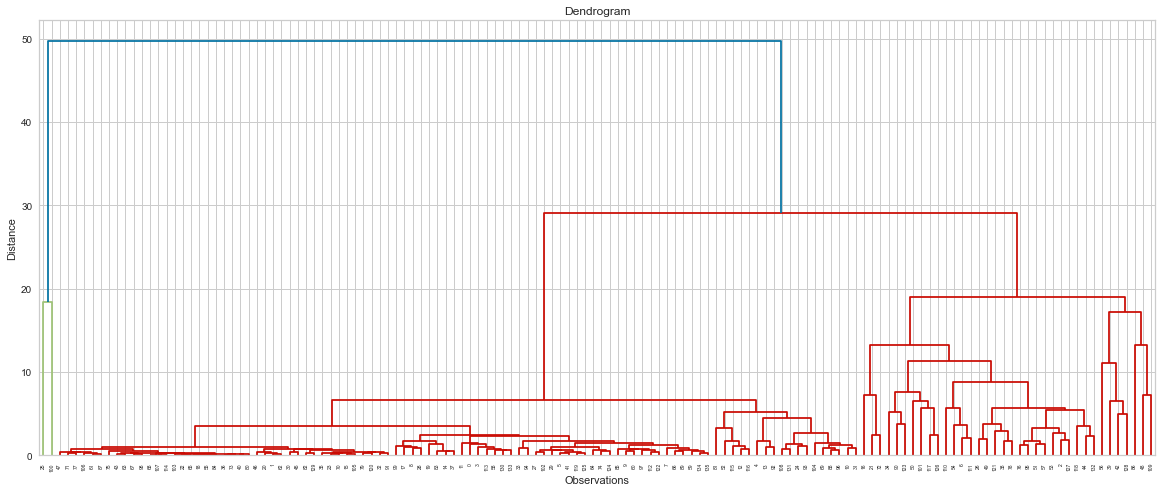

In [272]:
from scipy.cluster.hierarchy import dendrogram, linkage

hc_ward = linkage(y = df2, method = "ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")

plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(linkage(X_scaled, method = "ward"), leaf_font_size = 5);

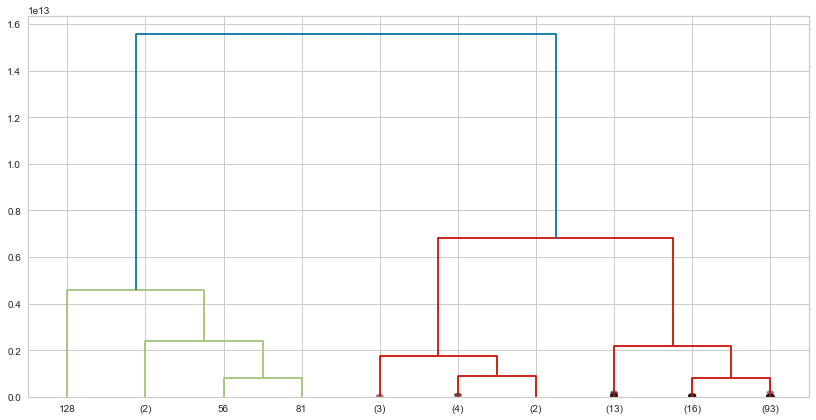

In [273]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

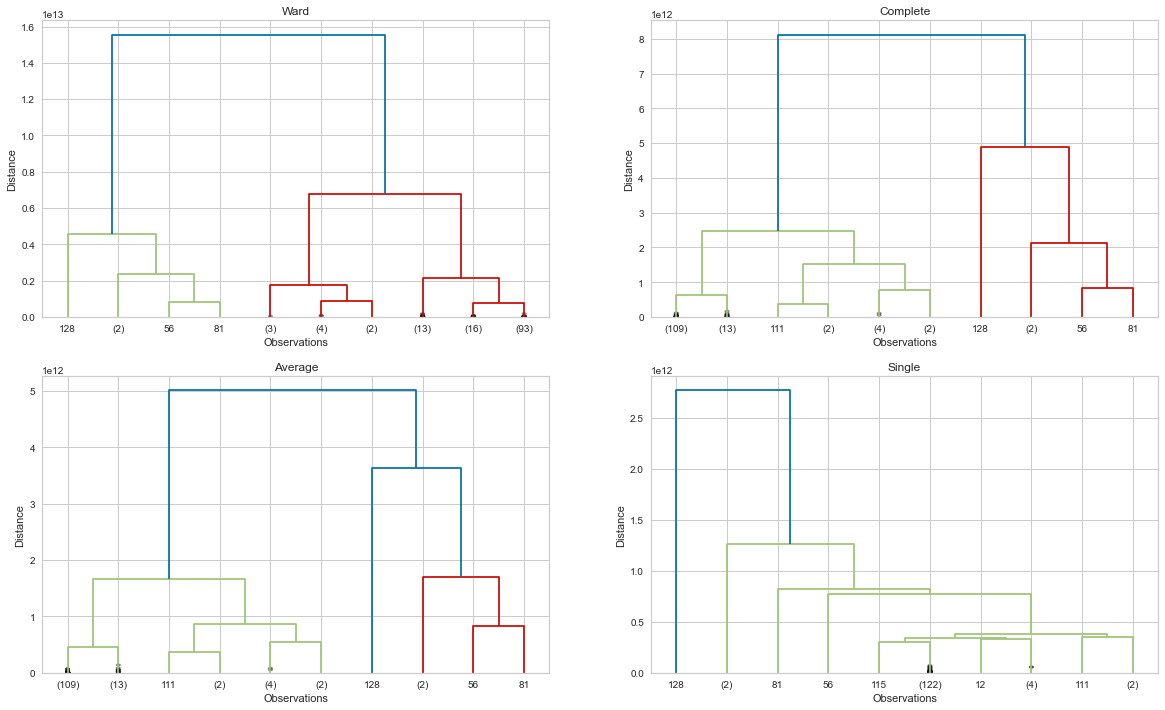

In [274]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### Model Building and label visualisation

In [500]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2, 10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                    affinity='euclidean', 
                                    linkage='ward').fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model_labels)}')

Silhouette Score for 2 clusters: 0.8609878837918018
Silhouette Score for 3 clusters: 0.5265693508501856
Silhouette Score for 4 clusters: 0.5059634282286498
Silhouette Score for 5 clusters: 0.5032626679687167
Silhouette Score for 6 clusters: 0.5118705882100696
Silhouette Score for 7 clusters: 0.514838629299197
Silhouette Score for 8 clusters: 0.5174551942087477
Silhouette Score for 9 clusters: 0.4832098760479544


In [501]:
model_labels = AgglomerativeClustering(n_clusters = 3,  
                                affinity='euclidean', 
                                linkage='ward').fit_predict(X_scaled)
clusters = model_labels
clusters

array([2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 2, 2], dtype=int64)

In [502]:
df2["predicted_clusters_hc"] = clusters

In [503]:
df2.head().T

country,Afghanistan,Albania,Algeria,Angola,Argentina
aircraft_strength_value,260.000,19.000,551.000,295.000,227.000
fighter_interceptor_strength_value,0.000,0.000,103.000,72.000,24.000
attack_aircraft_strength_value,25.000,0.000,22.000,18.000,7.000
transport_aircraft_fleet_strength_value,30.000,0.000,59.000,30.000,9.000
trainer_aircraft_fleet_value,0.000,0.000,87.000,47.000,64.000
helicopter_fleet_strength_value,187.000,19.000,257.000,126.000,100.000
attack_helicopter_fleet_strength_value,0.000,0.000,45.000,15.000,0.000
tank_strength_value,0.000,0.000,880.000,379.000,370.000
afv_apc_strength_value,1062.000,467.000,7361.000,595.000,739.000
self_propelled_artillery_strength_value,0.000,0.000,320.000,28.000,83.000


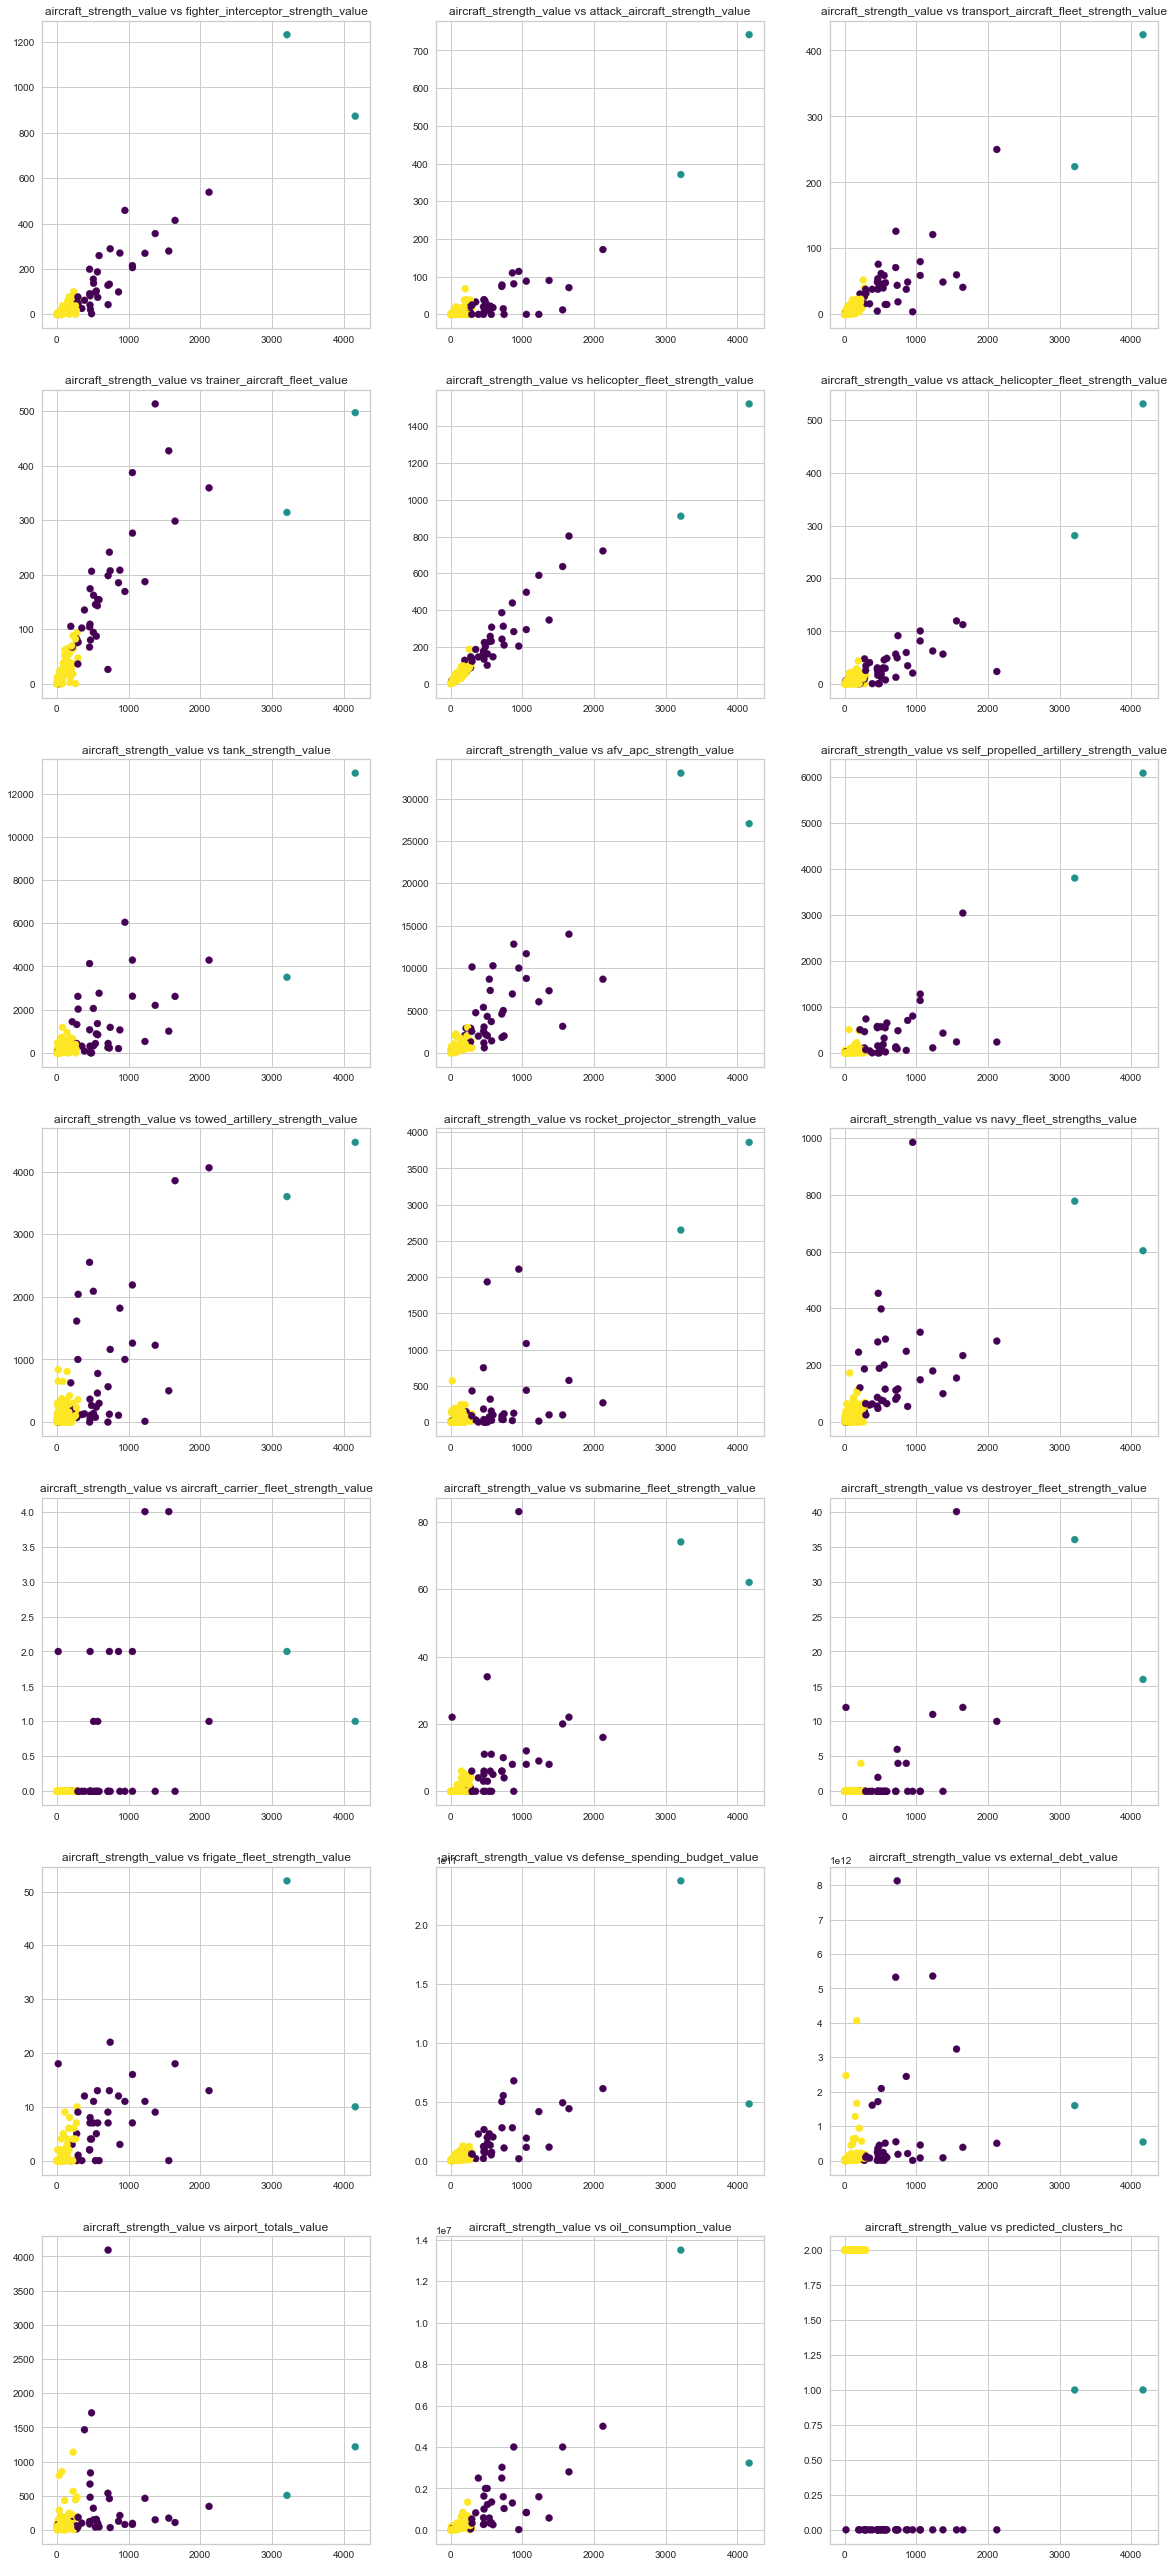

In [315]:
plt.figure(figsize = (20,60))
for idx in range(1,22):
    plt.subplot(9,3,idx)
    title=df2.columns[0]+" vs "+df2.columns[idx]
    plt.title(title)
    plt.scatter(df2.iloc[:,0], df2.iloc[:,idx], c = clusters, cmap = "viridis");


In [504]:
df2.predicted_clusters_hc.value_counts()

2    98
0    36
1     2
Name: predicted_clusters_hc, dtype: int64

In [505]:
df2['military_strength_power_index']=temp_power_index.military_strength_power_index

In [506]:
df2.T

country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Croatia,Cuba,Czechia,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Guatemala,Honduras,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Lithuania,Madagascar,Malaysia,Mali,Mauritania,Mexico,Moldova,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Romania,Russia,Saudi Arabia,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
aircraft_strength_value,260.000,19.000,551.000,295.000,227.000,64.000,464.000,120.000,147.000,109.000,177.000,202.000,148.000,69.000,19.000,45.000,715.000,63.000,16.000,22.000,29.000,385.000,3.000,35.000,282.000,3210.000,469.000,78.000,80.000,95.000,53.000,113.000,49.000,108.000,1054.000,51.000,7.000,86.000,194.000,1229.000,23.000,66.000,712.000,24.000,566.000,33.000,46.000,47.000,2123.000,462.000,509.000,348.000,19.000,589.000,860.000,8.000,1561.000,278.000,222.000,150.000,85.000,5.000,33.000,5.000,70.000,0.000,114.000,10.000,6.000,170.000,29.000,28.000,484.000,3.000,9.000,9.000,214.000,16.000,276.000,30.000,16.000,168.000,48.000,19.000,16.000,129.000,949.000,20.000,150.000,131.000,1372.000,39.000,33.000,273.000,171.000,457.000,90.000,123.000,13.000,143.000,4163.000,879.000,109.000,5.000,235.000,47.000,38.000,0.000,226.000,1649.000,19.000,512.000,77.000,190.000,3.000,204.000,169.000,456.000,744.000,25.000,34.000,570.000,147.000,1055.000,72.000,48.000,297.000,538.000,733.000,50.000,185.000,260.000,293.000,169.000,108.000,90.000
fighter_interceptor_strength_value,0.000,0.000,103.000,72.000,24.000,0.000,82.000,15.000,17.000,17.000,44.000,39.000,43.000,0.000,0.000,10.000,43.000,13.000,0.000,0.000,0.000,62.000,0.000,0.000,44.000,1232.000,21.000,12.000,38.000,12.000,2.000,33.000,0.000,9.000,215.000,0.000,0.000,24.000,55.000,269.000,6.000,0.000,128.000,0.000,187.000,0.000,3.000,12.000,538.000,41.000,155.000,26.000,0.000,259.000,99.000,0.000,279.000,44.000,76.000,17.000,27.000,0.000,0.000,0.000,0.000,0.000,17.000,0.000,0.000,26.000,9.000,0.000,3.000,0.000,0.000,0.000,46.000,8.000,59.000,6.000,0.000,61.000,0.000,0.000,0.000,8.000,458.000,0.000,59.000,29.000,356.000,0.000,0.000,17.000,0.000,91.000,24.000,24.000,2.000,26.000,873.000,270.000,9.000,0.000,100.000,10.000,0.000,0.000,17.000,414.000,0.000,137.000,0.000,46.000,0.000,71.000,54.000,199.000,289.000,0.000,14.000,75.000,12.000,206.000,24.000,10.000,48.000,98.000,133.000,0.000,66.000,38.000,77.000,77.000,18.000,10.000
attack_aircraft_strength_value,25.000,0.000,22.000,18.000,7.000,9.000,6.000,0.000,12.000,0.000,0.000,68.000,0.000,0.000,0.000,0.000,78.000,4.000,3.000,0.000,0.000,0.000,0.000,6.000,0.000,371.000,38.000,0.000,0.000,16.000,4.000,0.000,8.000,0.000,88.000,15.000,0.000,0.000,0.000,0.000,0.000,10.000,74.000,0.000,0.000,4.000,9.000,0.000,172.000,39.000,23.000,33.000,0.000,18.000,110.000,0.000,12.000,4.000,39.000,0.000,0.000,0.000,0.000,0.000,9.000,0.000,2.000,0.000,0.000,13.000,0.000,2.000,33.000,0.000,0.000,0.000,0.000,0.000,21.000,0.000,0.000,1.000,0.000,0.000,2.000,13.000,114.000,0.000,15.000,10.000,90.000,0.000,0.000,38.000,19.000,0.000,0.000,6.000,0.000,0.000,742.000,81.000,17.000,0.000,0.000,0.000,0.000,0.000,0.000,71.000,0.000,12.000,

In [507]:
#sort dataframe with ascending order of military power index
df2.sort_values(by="military_strength_power_index",inplace=True)
df2.T

country,Russia,China,India,Japan,South Korea,France,United Kingdom,Egypt,Brazil,Turkey,Italy,Germany,Iran,Pakistan,Indonesia,Saudi Arabia,Israel,Australia,Spain,Poland,Vietnam,Thailand,Canada,North Korea,Taiwan,Ukraine,Algeria,South Africa,Switzerland,Norway,Sweden,Greece,Czechia,Myanmar,Netherlands,Colombia,Mexico,Romania,Peru,Venezuela,Nigeria,Argentina,Malaysia,United Arab Emirates,Bangladesh,Chile,Philippines,Denmark,Iraq,Singapore,Uzbekistan,Belarus,Hungary,Syria,Angola,Morocco,Slovakia,Finland,Ethiopia,Portugal,Bulgaria,Kazakhstan,Azerbaijan,Serbia,Austria,Bolivia,Ecuador,Croatia,Belgium,Democratic Republic of the Congo,Jordan,Cuba,Yemen,Oman,Sudan,Turkmenistan,Afghanistan,New Zealand,Libya,Tunisia,Sri Lanka,Lithuania,Kenya,Kuwait,Uganda,Chad,Zambia,Georgia,Qatar,Zimbabwe,Guatemala,Bahrain,Tajikistan,Uruguay,Mali,Burkina Faso,Kyrgyzstan,Ireland,Slovenia,Cameroon,Latvia,Niger,Ivory Coast,Mongolia,Ghana,Cambodia,Botswana,Tanzania,Honduras,Armenia,Moldova,Paraguay,Nicaragua,Albania,Mozambique,South Sudan,Lebanon,Estonia,Dominican Republic,Republic of the Congo,Nepal,Montenegro,Mauritania,Madagascar,El Salvador,North Macedonia,Namibia,Central African Republic,Gabon,Laos,Panama,Bosnia and Herzegovina,Sierra Leone,Suriname,Somalia,Liberia
aircraft_strength_value,4163.000,3210.000,2123.000,1561.000,1649.000,1229.000,733.000,1054.000,715.000,1055.000,860.000,712.000,509.000,1372.000,462.000,879.000,589.000,464.000,512.000,457.000,293.000,570.000,385.000,949.000,744.000,297.000,551.000,226.000,169.000,150.000,204.000,566.000,95.000,276.000,168.000,469.000,484.000,143.000,273.000,260.000,129.000,227.000,170.000,538.000,177.000,282.000,171.000,113.000,348.000,235.000,185.000,202.000,47.000,456.000,295.000,214.000,47.000,194.000,86.000,90.000,63.000,222.000,147.000,109.000,120.000,69.000,108.000,78.000,148.000,53.000,278.000,80.000,169.000,131.000,190.000,72.000,260.000,48.000,114.000,147.000,77.000,10.000,150.000,85.000,48.000,35.000,108.000,66.000,123.000,90.000,33.000,109.000,25.000,50.000,29.000,16.000,5.000,19.000,38.000,29.000,5.000,16.000,8.000,9.000,24.000,22.000,45.000,34.000,46.000,64.000,3.000,33.000,19.000,19.000,16.000,19.000,70.000,7.000,49.000,13.000,16.000,9.000,28.000,6.000,51.000,20.000,30.000,3.000,23.000,33.000,39.000,19.000,5.000,3.000,0.000,0.000
fighter_interceptor_strength_value,873.000,1232.000,538.000,279.000,414.000,269.000,133.000,215.000,43.000,206.000,99.000,128.000,155.000,356.000,41.000,270.000,259.000,82.000,137.000,91.000,77.000,75.000,62.000,458.000,289.000,48.000,103.000,17.000,54.000,59.000,71.000,187.000,12.000,59.000,61.000,21.000,3.000,26.000,17.000,38.000,8.000,24.000,26.000,98.000,44.000,44.000,0.000,33.000,26.000,100.000,66.000,39.000,12.000,199.000,72.000,46.000,10.000,55.000,24.000,24.000,13.000,76.000,17.000,9.000,15.000,0.000,9.000,12.000,43.000,2.000,44.000,38.000,77.000,29.000,46.000,24.000,0.000,0.000,17.000,12.000,0.000,0.000,17.000,27.000,10.000,0.000,18.000,0.000,24.000,10.000,0.000,17.000,0.000,0.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,14.000,3.000,0.000,0.000,0.000,0.000,0.000,8.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,0.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
attack_aircraft_strength_value,742.000,371.000,172.000,12.000,71.000,0.000,15.000,88.000,78.000,0.000,110.000,74.000,23.000,90.000,39.000,81.000,18.000,6.000,12.000,0.000,0.000,19.000,0.000,114.000,0.000,25.000,22.000,0.000,0.000,15.000,0.000,0.000,16.000,21.000,1.000,38.000,33.000,0.000,38.000,0.000,13.000,7.000,13.000,20.000,0.000,0.000,19.000,0.000,33.000,0.000,20.000,68.000,0.000,20.000,18.000,0.000,0.000,0.000,0.000,0.000,4.000,39.000,12.000,17.000,0.000,0.000,0.000,0.000,0.000,4.000,4.000,0.000,0.000,10.000,38.000,20.000,25.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,0.000,10.000,6.000,0.000,4.000,0.000,0.000,7.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,9.000,9.000,0.000

In [508]:
df2.predicted_clusters_hc.value_counts()

2    98
0    36
1     2
Name: predicted_clusters_hc, dtype: int64

In [513]:
df2.loc[38:136, "actual_clusters"] = 2
df2.loc[2:38, "actual_clusters"] = 0
df2.loc[0:2, "actual_clusters"] = 1
df2[['actual_clusters','predicted_clusters_hc']]

,actual_clusters,predicted_clusters_hc
country,,
Russia,1.000,1
China,1.000,1
India,0.000,0
Japan,0.000,0
South Korea,0.000,0
France,0.000,0
United Kingdom,0.000,0
Egypt,0.000,0
Brazil,0.000,0


__Notice that 14 countries are not correctly assigned.__ 

In [517]:
(df2.predicted_clusters_hc==df2.actual_clusters).value_counts()

True     122
False     14
dtype: int64

In [519]:
df2[df2.predicted_clusters_hc!=df2.actual_clusters].T

country,South Africa,Switzerland,Norway,Sweden,Czechia,Netherlands,Romania,United Arab Emirates,Iraq,Syria,Morocco,Finland,Jordan,South Sudan
aircraft_strength_value,226.000,169.000,150.000,204.000,95.000,168.000,143.000,538.000,348.000,456.000,214.000,194.000,278.000,19.000
fighter_interceptor_strength_value,17.000,54.000,59.000,71.000,12.000,61.000,26.000,98.000,26.000,199.000,46.000,55.000,44.000,0.000
attack_aircraft_strength_value,0.000,0.000,15.000,0.000,16.000,1.000,0.000,20.000,33.000,20.000,0.000,0.000,4.000,0.000
transport_aircraft_fleet_strength_value,23.000,18.000,4.000,6.000,8.000,4.000,12.000,40.000,16.000,5.000,31.000,11.000,16.000,2.000
trainer_aircraft_fleet_value,88.000,54.000,32.000,69.000,15.000,27.000,41.000,145.000,102.000,67.000,67.000,105.000,75.000,0.000
helicopter_fleet_strength_value,91.000,42.000,47.000,53.000,44.000,75.000,62.000,229.000,186.000,165.000,64.000,127.000,146.000,17.000
attack_helicopter_fleet_strength_value,12.000,0.000,0.000,0.000,15.000,28.000,0.000,30.000,40.000,27.000,0.000,0.000,47.000,6.000
tank_strength_value,195.000,326.000,52.000,126.000,116.000,18.000,943.000,434.000,309.000,4135.000,1443.000,200.000,1313.000,110.000
afv_apc_strength_value,2000.000,1338.000,730.000,1036.000,682.000,1546.000,1369.000,8691.000,4739.000,5370.000,2901.000,2050.000,2897.000,200.000
self_propelled_artillery_strength_value,43.000,224.000,80.000,88.000,86.000,57.000,0.000,183.000,44.000,575.000,505.000,100.000,461.000,24.000


In [520]:
#This cluster is quite different than KMeans
df2[df2["predicted_clusters_hc"]==0].index

Index(['India', 'Japan', 'South Korea', 'France', 'United Kingdom', 'Egypt',
       'Brazil', 'Turkey', 'Italy', 'Germany', 'Iran', 'Pakistan', 'Indonesia',
       'Saudi Arabia', 'Israel', 'Australia', 'Spain', 'Poland', 'Vietnam',
       'Thailand', 'Canada', 'North Korea', 'Taiwan', 'Ukraine', 'Algeria',
       'Greece', 'Myanmar', 'Colombia', 'Mexico', 'United Arab Emirates',
       'Iraq', 'Syria', 'Morocco', 'Finland', 'Jordan', 'South Sudan'],
      dtype='object', name='country')

In [521]:
#this is same as KMeans
df2[df2["predicted_clusters_hc"]==1].index

Index(['Russia', 'China'], dtype='object', name='country')

In [522]:
df2[df2["predicted_clusters_hc"]==2].index

Index(['South Africa', 'Switzerland', 'Norway', 'Sweden', 'Czechia',
       'Netherlands', 'Romania', 'Peru', 'Venezuela', 'Nigeria', 'Argentina',
       'Malaysia', 'Bangladesh', 'Chile', 'Philippines', 'Denmark',
       'Singapore', 'Uzbekistan', 'Belarus', 'Hungary', 'Angola', 'Slovakia',
       'Ethiopia', 'Portugal', 'Bulgaria', 'Kazakhstan', 'Azerbaijan',
       'Serbia', 'Austria', 'Bolivia', 'Ecuador', 'Croatia', 'Belgium',
       'Democratic Republic of the Congo', 'Cuba', 'Yemen', 'Oman', 'Sudan',
       'Turkmenistan', 'Afghanistan', 'New Zealand', 'Libya', 'Tunisia',
       'Sri Lanka', 'Lithuania', 'Kenya', 'Kuwait', 'Uganda', 'Chad', 'Zambia',
       'Georgia', 'Qatar', 'Zimbabwe', 'Guatemala', 'Bahrain', 'Tajikistan',
       'Uruguay', 'Mali', 'Burkina Faso', 'Kyrgyzstan', 'Ireland', 'Slovenia',
       'Cameroon', 'Latvia', 'Niger', 'Ivory Coast', 'Mongolia', 'Ghana',
       'Cambodia', 'Botswana', 'Tanzania', 'Honduras', 'Armenia', 'Moldova',
       'Paraguay', 'Nicarag

__Summary:__ Remember, United States is one cluster. China and Russia has formed a cluster like KMeans algorithm.The last two clusters have 36 and 98 members.

### Evaluate 

In [523]:
df2["military_power"] = df2["predicted_clusters_hc"].map({  0 : "medium",
                                                            1 : "high",
                                                            2 : "low" 
                                                         })

In [524]:
df2.head().T

country,Russia,China,India,Japan,South Korea
aircraft_strength_value,4163.000,3210.000,2123.000,1561.000,1649.000
fighter_interceptor_strength_value,873.000,1232.000,538.000,279.000,414.000
attack_aircraft_strength_value,742.000,371.000,172.000,12.000,71.000
transport_aircraft_fleet_strength_value,424.000,224.000,250.000,60.000,41.000
trainer_aircraft_fleet_value,497.000,314.000,359.000,427.000,298.000
helicopter_fleet_strength_value,1522.000,911.000,722.000,637.000,803.000
attack_helicopter_fleet_strength_value,531.000,281.000,23.000,119.000,112.000
tank_strength_value,12950.000,3500.000,4292.000,1004.000,2614.000
afv_apc_strength_value,27038.000,33000.000,8686.000,3130.000,14000.000
self_propelled_artillery_strength_value,6083.000,3800.000,235.000,238.000,3040.000


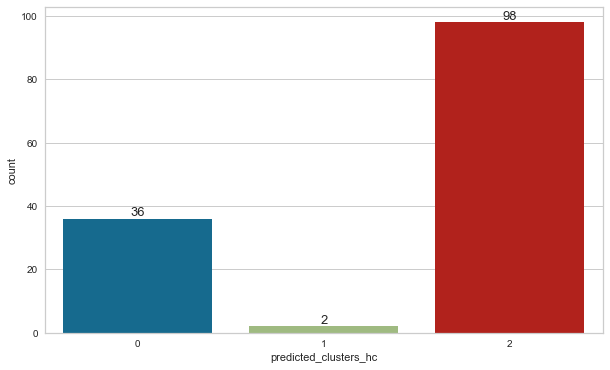

In [525]:
df2.predicted_clusters_hc.value_counts()

sns.countplot(x=df2["predicted_clusters_hc"], data=df2)
for index,value in enumerate(df2.predicted_clusters_hc.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [526]:
df2["military_power"].value_counts()

low       98
medium    36
high       2
Name: military_power, dtype: int64

In [527]:
df1.head().T

,0,1,2,3,4
country,Russia,China,India,Japan,South Korea
aircraft_strength_value,4163.000,3210.000,2123.000,1561.000,1649.000
fighter_interceptor_strength_value,873.000,1232.000,538.000,279.000,414.000
attack_aircraft_strength_value,742.000,371.000,172.000,12.000,71.000
transport_aircraft_fleet_strength_value,424.000,224.000,250.000,60.000,41.000
trainer_aircraft_fleet_value,497.000,314.000,359.000,427.000,298.000
helicopter_fleet_strength_value,1522.000,911.000,722.000,637.000,803.000
attack_helicopter_fleet_strength_value,531.000,281.000,23.000,119.000,112.000
tank_strength_value,12950.000,3500.000,4292.000,1004.000,2614.000
afv_apc_strength_value,27038.000,33000.000,8686.000,3130.000,14000.000


In [528]:
#sort dataframe with ascending order of military power index
df2.sort_values(by="military_strength_power_index", inplace=True)
df2.reset_index(inplace=True)
df2.head().T

,0,1,2,3,4
country,Russia,China,India,Japan,South Korea
aircraft_strength_value,4163.000,3210.000,2123.000,1561.000,1649.000
fighter_interceptor_strength_value,873.000,1232.000,538.000,279.000,414.000
attack_aircraft_strength_value,742.000,371.000,172.000,12.000,71.000
transport_aircraft_fleet_strength_value,424.000,224.000,250.000,60.000,41.000
trainer_aircraft_fleet_value,497.000,314.000,359.000,427.000,298.000
helicopter_fleet_strength_value,1522.000,911.000,722.000,637.000,803.000
attack_helicopter_fleet_strength_value,531.000,281.000,23.000,119.000,112.000
tank_strength_value,12950.000,3500.000,4292.000,1004.000,2614.000
afv_apc_strength_value,27038.000,33000.000,8686.000,3130.000,14000.000


In [529]:
(df2.predicted_clusters_hc==df1.predicted_clusters).sum()

21

In [530]:
df1[df2.predicted_clusters_hc!=df1.predicted_clusters]['country']

0                                Russia
1                                 China
2                                 India
3                                 Japan
4                           South Korea
5                                France
6                        United Kingdom
7                                 Egypt
8                                Brazil
9                                Turkey
10                                Italy
11                              Germany
12                                 Iran
13                             Pakistan
15                         Saudi Arabia
23                          North Korea
24                               Taiwan
27                         South Africa
28                          Switzerland
29                               Norway
30                               Sweden
32                              Czechia
34                          Netherlands
37                              Romania
38                                 Peru


__Summary:__ HC and KMeans give completely different results. Only 21 prediction have coincides.